<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import-data-and-parameters" data-toc-modified-id="Import-data-and-parameters-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Import data and parameters</a></span></li><li><span><a href="#System-initialization" data-toc-modified-id="System-initialization-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>System initialization</a></span><ul class="toc-item"><li><span><a href="#Exporting-so-we-don't-have-to-run-those-again" data-toc-modified-id="Exporting-so-we-don't-have-to-run-those-again-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Exporting so we don't have to run those again</a></span></li></ul></li><li><span><a href="#Simulation" data-toc-modified-id="Simulation-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Simulation</a></span><ul class="toc-item"><li><span><a href="#Scenario-parameters" data-toc-modified-id="Scenario-parameters-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Scenario parameters</a></span><ul class="toc-item"><li><span><a href="#Constant-Shocks" data-toc-modified-id="Constant-Shocks-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>Constant Shocks</a></span></li><li><span><a href="#Linear-Ramps-to-Shock" data-toc-modified-id="Linear-Ramps-to-Shock-3.1.2"><span class="toc-item-num">3.1.2&nbsp;&nbsp;</span>Linear Ramps to Shock</a></span></li><li><span><a href="#100%-Refinery-Secondary-Ratio-Spread-&amp;-TCRC-Elasticities,-100%-Linear-Shock" data-toc-modified-id="100%-Refinery-Secondary-Ratio-Spread-&amp;-TCRC-Elasticities,-100%-Linear-Shock-3.1.3"><span class="toc-item-num">3.1.3&nbsp;&nbsp;</span>100% Refinery Secondary Ratio Spread &amp; TCRC Elasticities, 100% Linear Shock</a></span></li><li><span><a href="#20%-Refinery-Secondary-Ratio-Spread-&amp;-TCRC-Elasticities,-20%-Linear-Shock" data-toc-modified-id="20%-Refinery-Secondary-Ratio-Spread-&amp;-TCRC-Elasticities,-20%-Linear-Shock-3.1.4"><span class="toc-item-num">3.1.4&nbsp;&nbsp;</span>20% Refinery Secondary Ratio Spread &amp; TCRC Elasticities, 20% Linear Shock</a></span></li><li><span><a href="#Mine-Production-Elasticity,-20%-Linear-Shock-Increase" data-toc-modified-id="Mine-Production-Elasticity,-20%-Linear-Shock-Increase-3.1.5"><span class="toc-item-num">3.1.5&nbsp;&nbsp;</span>Mine Production Elasticity, 20% Linear Shock Increase</a></span></li><li><span><a href="#Scrap-Supply-&amp;-Demand-Elasticity,-20%-Linear-Shock-Increase" data-toc-modified-id="Scrap-Supply-&amp;-Demand-Elasticity,-20%-Linear-Shock-Increase-3.1.6"><span class="toc-item-num">3.1.6&nbsp;&nbsp;</span>Scrap Supply &amp; Demand Elasticity, 20% Linear Shock Increase</a></span></li><li><span><a href="#400%-DE,-20%-Linear-Shock-Increase,-Varying-Time-Elapsed-to-Base-Shock" data-toc-modified-id="400%-DE,-20%-Linear-Shock-Increase,-Varying-Time-Elapsed-to-Base-Shock-3.1.7"><span class="toc-item-num">3.1.7&nbsp;&nbsp;</span>400% DE, 20% Linear Shock Increase, Varying Time Elapsed to Base Shock</a></span></li><li><span><a href="#200%-DE,-20%-Linear-Shock-Increase,-Varying-Time-Elapsed-to-Base-Shock" data-toc-modified-id="200%-DE,-20%-Linear-Shock-Increase,-Varying-Time-Elapsed-to-Base-Shock-3.1.8"><span class="toc-item-num">3.1.8&nbsp;&nbsp;</span>200% DE, 20% Linear Shock Increase, Varying Time Elapsed to Base Shock</a></span></li></ul></li><li><span><a href="#Simulation-main" data-toc-modified-id="Simulation-main-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Simulation main</a></span><ul class="toc-item"><li><span><a href="#Availability-Update" data-toc-modified-id="Availability-Update-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>Availability Update</a></span></li><li><span><a href="#Pre-Availability-Update" data-toc-modified-id="Pre-Availability-Update-3.2.2"><span class="toc-item-num">3.2.2&nbsp;&nbsp;</span>Pre Availability Update</a></span></li></ul></li><li><span><a href="#Save-results" data-toc-modified-id="Save-results-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Save results</a></span></li><li><span><a href="#Price-evolution" data-toc-modified-id="Price-evolution-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Price evolution</a></span></li><li><span><a href="#Supply-and-demand-evolution" data-toc-modified-id="Supply-and-demand-evolution-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Supply and demand evolution</a></span></li><li><span><a href="#Ore-grade-evolution" data-toc-modified-id="Ore-grade-evolution-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Ore grade evolution</a></span></li><li><span><a href="#Availability-Evolution" data-toc-modified-id="Availability-Evolution-3.7"><span class="toc-item-num">3.7&nbsp;&nbsp;</span>Availability Evolution</a></span></li></ul></li><li><span><a href="#Scenario-Analysis" data-toc-modified-id="Scenario-Analysis-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Scenario Analysis</a></span></li></ul></div>

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from datetime import datetime
from dateutil.relativedelta import relativedelta
idx = pd.IndexSlice
import random 
from scipy import stats
# import importlib
from gurobipy import *

from cn_mine_simulation_tools import *
from cn_refinery import *
from cn_scrap_supply_tools import *
from cn_demand_tools import *
from cn_price_formation import * 
from cn_blending import *

import pickle
import shelve

# Import data and parameters

In [68]:
## High level parameters
historical_prod=pd.read_excel('Data/Production data compile.xlsx', sheet_name='Selected', index_col=0)
historical_price=pd.read_excel('Data/Price data compile.xlsx', sheet_name='Price', index_col=0) # All prices 2017 constant
historical_price.drop(['Grape','Low_brass','Pb_Red_Brass'], axis = 1, inplace = True)
ref_prices_future = pd.read_csv('Data/Future metal prices.csv',index_col=0).loc[:,'Ref_Zn':]
ref_prices_historical = historical_price.loc[:,'Ref_Zn':'Ref_Fe']
ref_prices_historical.drop(2018)
ref_prices_future.index = list(range(2018,2048))
ref_prices = pd.concat([ref_prices_historical,ref_prices_future])

# Specific prod and mine data
historical_mining_prod=historical_prod.loc[:, 'Total mining production']
historical_lme_price=historical_price.loc[:, 'LME']
ref_price=pd.concat([historical_price.loc[:,'Ref_Zn':'Ref_Fe'],ref_prices_future])
historical_tcrc=historical_price.loc[:, 'Annual TCRC']
historical_no2=historical_price.loc[:, 'No.2 ref']
historical_sp2=historical_lme_price-historical_no2
historical_no1 = historical_price.loc[:,'Barley brass']
historical_sp1 = historical_lme_price-historical_no1
historical_alloyed = historical_price.loc[:,'Yellow_Brass':'Cartridge']
historical_alloyed = historical_alloyed[sorted(list(historical_alloyed.columns))]
scraps = list(historical_alloyed.columns)
historical_spa = historical_alloyed.apply(lambda x: -x + historical_lme_price)
raw_price = pd.concat([historical_price.loc[:,'Ref_Cu':'Cartridge'],ref_prices_future.loc[2019:,:]],sort=False)
raw_price.loc[:,'No.1'] = historical_no1
raw_price.loc[:,'No.2'] = historical_no2
raw_price.loc[2019:,:] = 0
ref_metals = list(ref_price.columns)

## Primary supply data and patameters
operating_mine_pool=pd.read_excel('Data/primary supply/Operating mine pool.xls', sheet_name='Sheet1', index_col=0)
open_parameter=pd.read_excel('Data/primary supply/Opening subsample parameter.xlsx', sheet_name='max5', index_col=0)
incentive_pool=pd.read_excel('Data/primary supply/Incentive mine pool.xls', sheet_name='Sheet1', index_col=0)
pri_hyper_param=pd.read_excel('Data/primary supply/Hyperparameters.xlsx', sheet_name='Sheet1', index_col=0)

## Refinery parameters
ref_hyper_param=pd.read_excel('Data/refined supply/Refinery hyperparameter.xlsx', sheet_name='Parameters', index_col=0)
conc_to_cathode_eff=ref_hyper_param.loc['conc to cathode eff', 'Value']
scrap_to_cathode_eff=ref_hyper_param.loc['scrap to cathode eff', 'Value']

## Semis demand parameters
gdp_growth_prediction_base=pd.read_excel('Data/semis demand/Demand prediction data.xlsx', sheet_name='GDP growth', index_col=0, usecols=np.arange(6))
volume_prediction_base=pd.read_excel('Data/semis demand/Demand prediction data.xlsx', sheet_name='All sectors', index_col=0, header=[0,1])
intensity_prediction=pd.read_excel('Data/semis demand/Intensity initial.xls', sheet_name='Sheet1', index_col=0, header=[0,1])
elas_sec_reg=pd.read_excel('Data/semis demand/Elasticity estimates.xlsx', sheet_name='S+R S intercept only', index_col=0)
sector_shape_matrix=pd.read_excel('Data/semis demand/Sector to shape matrix.xlsx', sheet_name='Sheet1', index_col=0)
calibration_1718=pd.read_excel('Data/semis demand/2017 and 2018 calibration.xlsx', sheet_name='Sheet1', index_col=0)

# Adjust demand in 2018 to scale it back to ICSG
intensity_prediction.loc[2017, :] = intensity_prediction.loc[2017, :]\
.mul(calibration_1718.loc[2017, 'ICSG refined usage']).div(calibration_1718.loc[2017, 'simulated refined usage'])
intensity_prediction.loc[2018, :] = intensity_prediction.loc[2018, :]\
.mul(calibration_1718.loc[2018, 'ICSG refined usage']).div(calibration_1718.loc[2018, 'simulated refined usage'])
demand_prediction=volume_prediction_base.loc[2015:, :].mul(intensity_prediction.fillna(0))

## Scrap supply parameters
use_sector_combined=pd.read_excel('Data/scrap supply/End use combined data.xlsx', sheet_name='Combined', index_col=0)
sector_to_product=pd.read_excel('Data/scrap supply/All accounting matrix.xlsx', sheet_name='sector to product', index_col=0)
product_to_waste=pd.read_excel('Data/scrap supply/All accounting matrix.xlsx', sheet_name='product to waste', index_col=0)
product_life_and_eff=pd.read_excel('Data/scrap supply/All accounting matrix.xlsx', sheet_name='product lifetime and efficiency', index_col=0)
product_to_cathode_alloy=pd.read_excel('Data/scrap supply/All accounting matrix.xlsx', sheet_name='product to copper or alloy', index_col=0)
recycle_efficiency=pd.read_excel('Data/scrap supply/All accounting matrix.xlsx', sheet_name='recycling efficiency', index_col=0)

# Availability-specific parameters
s2s = pd.read_excel('Data/Shape-Sector Distributions.xlsx')
prod_spec = pd.read_excel('Data/Prod_spec_20191010.xlsx')
raw_spec = pd.read_excel('Data/Raw_spec_201901.xlsx',index_col=0)
raw_spec.drop(['Grape','Low_brass','Pb_Red_Brass'],inplace=True)
for i in prod_spec.index:
    prod_spec.loc[i,'UNS'] = prod_spec.loc[i,'UNS']+' '+prod_spec.loc[i,'Category']

# Home scrap ratio
home_scrap_ratio_file=pd.read_excel('Data/scrap supply/Home scrap ratio.xls', sheet_name='Sheet1', index_col=0)
home_scrap_ratio_series=home_scrap_ratio_file.loc[:, 'Calibrated ratio']
exchange_scrap_ratio_series=0.9-home_scrap_ratio_series

# Sector end use to product matrix 
use_product_history=pd.DataFrame(np.matmul(use_sector_combined, sector_to_product.transpose()), 
                                 index=use_sector_combined.index, columns=sector_to_product.index)
# Product to waste matrices
product_to_waste_collectable=product_to_waste.iloc[:, :-2]
product_to_waste_no_loss=product_to_waste_collectable.mul(1/product_to_waste_collectable.sum(axis=1), axis=0)

# Product lifetime parameters and frequencies
product_lifetime=product_life_and_eff.loc[:, 'Lifetime']
product_lifetime_df=lifetime_df(product_lifetime)
product_lifetime_freq_df=lifetime_freq_df(product_lifetime_df)

# Recycling and fabrication efficiencies
sort_eff=recycle_efficiency.iloc[:, 0]
collect_rate=recycle_efficiency.iloc[:, 1]
fab_eff=product_life_and_eff.loc[:, 'Fabrication efficiency']
new_scrap_gen=1/fab_eff-1
sort_eff_series=pd.DataFrame(np.array((list(sort_eff)*23)).reshape(23, 6), index=np.arange(2018, 2041), columns=sort_eff.index)
collect_rate_series=pd.DataFrame(np.array((list(collect_rate)*23)).reshape(23, 6), index=np.arange(2018, 2041), columns=collect_rate.index)

## Price formation parameters
price_formation_param=pd.read_excel('Data/price formation/Price formation.xlsx', sheet_name='Sheet1', index_col=0)
cathode_sd_elas=price_formation_param.loc['Cathode SD elasticity', 'Value']
conc_sd_elas=price_formation_param.loc['Concentrate SD elasticity', 'Value']
cathode_sp2_elas=price_formation_param.loc['SP2 cathode elasticity', 'Value']
sp2_sd_elas=price_formation_param.loc['SP2 SD elasticity', 'Value']
cathode_sp1_elas=price_formation_param.loc['SP1 cathode elasticity', 'Value']
sp1_sd_elas=price_formation_param.loc['SP1 SD elasticity', 'Value']
cathode_alloyed_elas=price_formation_param.loc['SP2 SD elasticity', 'Value']
alloyed_sd_elas=price_formation_param.loc['SP Alloy SD elasticity', 'Value']

print(str(datetime.now()))

2019-11-19 21:34:07.813584


# System initialization
Need to add:
- scrap prices
- old scrap update
- new scrap update
- blending to determine scrap used previously?

In [69]:
# Initialize simulation time
history_start_time='19600101'
simulation_start_time='20180101'
simulation_end_time='20400101'
simulation_time=pd.date_range(simulation_start_time, simulation_end_time, freq='AS')
history_time=pd.date_range(history_start_time, simulation_start_time, freq='AS')

# Cathode price
cathode_price_series=pd.Series(0, index=history_time)
cathode_price_series.loc[:'20180101']=historical_lme_price.values

# TCRC
tcrc_series=pd.Series(0, index=history_time)
tcrc_series.loc[:'20180101']=historical_tcrc.values

# Scrap spreads (No.2, No.1, alloyed)
sp2_series=pd.Series(0, index=history_time)
sp2_series.loc[:'20180101']=historical_sp2.values
sp1_series = pd.Series(0, index=history_time)
sp1_series.loc[:'20180101'] = historical_sp1.values
spa_series = pd.DataFrame(0, index=history_time, columns=scraps)
spa_series.loc[:'20180101']= historical_spa.values

# Initialize mining stats
mine_life_stats_panel_operating=mine_life_stats_panel_init(simulation_time, operating_mine_pool)
mine_pool_new_last=pd.DataFrame()
mine_life_stats_panel_new_last=pd.DataFrame()
total_mining_prod=pd.Series(0, index=simulation_time)

# Initilize sxew ids
sxew_id_operating_bool=operating_mine_pool.loc[:, 'Payable percent (%)']==100
sxew_id_operating=[i for i in sxew_id_operating_bool.index if sxew_id_operating_bool.loc[i]]
sxew_id_new_bool=incentive_pool.loc[:, 'Payable percent (%)']==100
sxew_id_new=[i for i in sxew_id_new_bool.index if sxew_id_new_bool.loc[i]]
sxew_new=pd.Series(0, index=simulation_time)
sxew_all=pd.Series(0, index=pd.date_range('20170101', simulation_end_time, freq='AS'))
sxew_all.loc['20170101']=historical_prod.loc[2017, 'SX-EW production']

# Initialize refinery stats
ref_stats=ref_stats_init(simulation_time, ref_hyper_param)

# Initialize concentrate prod, add 2017
conc_prod_series=pd.Series(0, index=pd.date_range('20170101', simulation_end_time, freq='AS'))
conc_prod_series.loc['20170101']=historical_prod.loc[2017, 'Concentrate production']

# Initialize refined supply and demand
ref_prod_series=pd.Series(0, index=simulation_time)
ref_demand_series=pd.Series(0, index=pd.date_range('20170101', simulation_end_time, freq='AS'))
ref_demand_series.loc['20170101']=historical_prod.loc[2017, 'Refined usage']

# Initialize end use by product stats
use_product_future=pd.DataFrame(0, index=np.arange(2019, 2041, 1), columns=use_product_history.columns)
use_product_all_life=pd.concat([use_product_history, use_product_future])

# Initialize old scrap history
product_eol_history=product_reach_eol(use_product_history, product_lifetime_freq_df)
waste_from_old_history=pd.DataFrame(np.matmul(product_eol_history, product_to_waste_collectable), 
                                     index=product_eol_history.index, 
                                     columns=product_to_waste_collectable.columns).mul(sort_eff).mul(collect_rate)
waste_from_old_future=pd.DataFrame(0, index=np.arange(2019, 2041, 1), columns=product_to_waste_collectable.columns)
waste_from_old_all_life=pd.concat([waste_from_old_history, waste_from_old_future])

# Old scrap available 
old_scrap_available_history = old_scrap_gen_init(product_eol_history, product_to_waste_collectable, product_to_cathode_alloy,
                                     collect_rate, sort_eff, prod_spec, s2s, fraction_no1 = 0.1)
old_scrap_available_future=pd.DataFrame(0, index=np.arange(2019, 2041, 1), columns=old_scrap_available_history.columns)
old_scrap_available = pd.concat([old_scrap_available_history, old_scrap_available_future])

# Initialize new scrap history
waste_from_new_history=pd.DataFrame(0, index=waste_from_old_history.index, columns=product_to_waste_collectable.columns)
new_scrap_available_history = pd.DataFrame(0, index = product_eol_history.index, columns = old_scrap_available_history.columns)
for year_i in new_scrap_available_history.index:
    home_scrap_ratio=home_scrap_ratio_series.loc[year_i]
    exchange_scrap_ratio=exchange_scrap_ratio_series.loc[year_i]
    waste_from_new_year_i=\
    simulate_new_scrap_one_year(year_i, use_product_history, new_scrap_gen, product_to_waste_no_loss, sort_eff, 
                                home_scrap_ratio, exchange_scrap_ratio)
    waste_from_new_history.loc[year_i]=waste_from_new_year_i.values
    
    # Initialize new scrap availability history
    new_scrap_available_year_i = \
    new_scrap_gen_oneyear(use_product_history.loc[year_i], product_to_waste_no_loss, product_to_cathode_alloy, 
                          collect_rate, sort_eff, prod_spec, s2s, new_scrap_gen, exchange_scrap_ratio, 
                          home_scrap_ratio, fraction_no1 = 0.1)
    new_scrap_available_history.loc[year_i] = new_scrap_available_year_i

waste_from_new_future=pd.DataFrame(0, index=np.arange(2019, 2041, 1), columns=product_to_waste_collectable.columns)
waste_from_new_all_life=pd.concat([waste_from_new_history, waste_from_new_future])
new_scrap_available_future = pd.DataFrame(0, index=np.arange(2019, 2041, 1), columns = new_scrap_available_history.columns)
new_scrap_available = pd.concat([new_scrap_available_history, new_scrap_available_future])

waste_all_life=waste_from_old_all_life+waste_from_new_all_life
all_scrap_available = old_scrap_available + new_scrap_available
total_unalloyed = all_scrap_available.loc[:,'No.1':'No.2'].sum(axis = 1)

# assuming historical No.1/No.2 ratio is at the 2018 value 
all_scrap_available.loc[:,'No.1'] = total_unalloyed.loc[:] - historical_prod.loc[:, 'Secondary refining production'] / scrap_to_cathode_eff
all_scrap_available.loc[:,'No.2'] = historical_prod.loc[:, 'Secondary refining production'] / scrap_to_cathode_eff
# all_scrap_available.loc[:2017,'No.1'] = total_unalloyed.loc[:2017] * all_scrap_available.loc[2018,'No.1'] / total_unalloyed.loc[2018]
# all_scrap_available.loc[:2017,'No.2'] = total_unalloyed.loc[:2017] * all_scrap_available.loc[2018,'No.2'] / total_unalloyed.loc[2018]

# Initialize scrap demand
direct_melt_scrap_demand=(use_product_all_life*product_to_cathode_alloy.loc[:, 'Alloyed']).sum(axis=1)
direct_melt_sectorial_demand=(use_product_all_life*product_to_cathode_alloy.loc[:, 'Alloyed'])
direct_melt_demand = pd.DataFrame(0, index = np.arange(1960,2041), columns = raw_price.columns)
refined_scrap_demand=historical_prod.loc[:, 'Secondary refining production'].div(scrap_to_cathode_eff)
total_secondary_demand=pd.DataFrame({'Direct melt scrap': direct_melt_scrap_demand, 
                                          'Refined scrap': refined_scrap_demand})

# Adding in historical blending
# Generating Prices (assuming all metals' price ratios as compared with Ref_Cu remain constant at the earliest level we have)
raw_price.loc[1960:1998, 'Ref_Cu'] = cathode_price_series.loc[pd.datetime(1960, 1, 1):pd.datetime(1998, 1, 1)].values
raw_price.loc[1960,'Ref_Zn':'Cartridge'] = raw_price.loc[1999,'Ref_Zn':'Cartridge'] / raw_price.loc[1999,'Ref_Cu'] \
    * raw_price.loc[1960,'Ref_Cu']
raw_price.loc[1960,'No.1':'No.2'] = raw_price.loc[1993,'No.1':'No.2'] / raw_price.loc[1993,'Ref_Cu'] \
    * raw_price.loc[1960,'Ref_Cu']
raw_price.loc[1961:1998,'Ref_Zn':'Cartridge'] = raw_price.loc[1961:1998,'Ref_Cu'].apply(
    lambda x: x * raw_price.loc[1999,'Ref_Zn':'Cartridge'] / raw_price.loc[1999,'Ref_Cu'])
raw_price.loc[1961:1992,'No.1':'No.2'] = raw_price.loc[1961:1992,'Ref_Cu'].apply(
    lambda x: x * raw_price.loc[1999,'No.1':'No.2'] / raw_price.loc[1999,'Ref_Cu'])

# Blending to determine demand in the direct melt sector
for year_i in np.arange(1960,2019):
    direct_melt_demand.loc[year_i,:] = pd.Series(blend(all_scrap_available.loc[year_i,:], 
                                                   direct_melt_sectorial_demand.loc[year_i], 
                                                   raw_price.loc[year_i,:], s2s, prod_spec, raw_spec))
    if year_i % 10 == 0:
        print(year_i)
total_scrap_demand_all_life=pd.DataFrame({'Direct melt scrap': direct_melt_demand.loc[:,'Yellow_Brass':'No.1'].sum(axis=1), 
                                          'Refined scrap': refined_scrap_demand})
direct_melt_demand.loc[:,'No.2'] = all_scrap_available.loc[1960:,'No.2']

print(str(datetime.now()))

1960
1970
1980
1990
2000
2010
2019-11-19 21:37:07.290321


In [73]:
all_scrap_available

,No.1,No.2,Al_Bronze,Cartridge,Low_Brass,Mn_Bronze,Ni_Ag,Ocean,Pb_Sn_Bronze,Pb_Yellow_Brass,Red_Brass,Sn_Bronze,Yellow_Brass
1912,NaN,NaN,5.666829,9.501142,0.913241,0.464444,6.399659,4.341236,4.255321,10.678895,1.936488,4.663887,8.437639
1913,NaN,NaN,5.800166,9.724698,0.934729,0.475372,6.550239,4.443382,4.355446,10.930163,1.982053,4.773625,8.636172
1914,NaN,NaN,5.933681,9.949361,0.956295,0.486322,6.701207,4.545661,4.455575,11.181548,2.027819,4.883751,8.834798
1915,NaN,NaN,6.085367,10.286975,0.985843,0.499509,6.891862,4.661563,4.556140,11.445360,2.094159,5.033452,9.043114
1916,NaN,NaN,6.311162,11.068885,1.047039,0.521738,7.241542,4.834915,4.660774,11.774252,2.241607,5.339990,9.292543
1917,NaN,NaN,6.563781,11.896028,1.113238,0.546565,7.628338,5.040061,4.783597,12.218874,2.398633,5.670763,9.571631
1918,NaN,NaN,6.866816,12.737597,1.184757,0.575448,8.070565,5.303421,4.952753,12.902512,2.561618,6.026110,9.927455
1919,NaN,NaN,7.283239,13.905531,1.284481,0.615009,8.687588,5.665619,5.184387,13.867764,2.788241,6.518793,10.422932
1920,NaN,NaN,7.802639,15.419336,1.412160,0.664395,9.467626,6.106876,5.466474,15.009932,3.080878,7.148928,11.043329
1921,NaN,NaN,8.376900,17.123145,1.554337,0.719176,10.328404,6.586602,5.774242,16.200204,3.409108,7.852667,11.725234


<IPython.core.display.Javascript object>


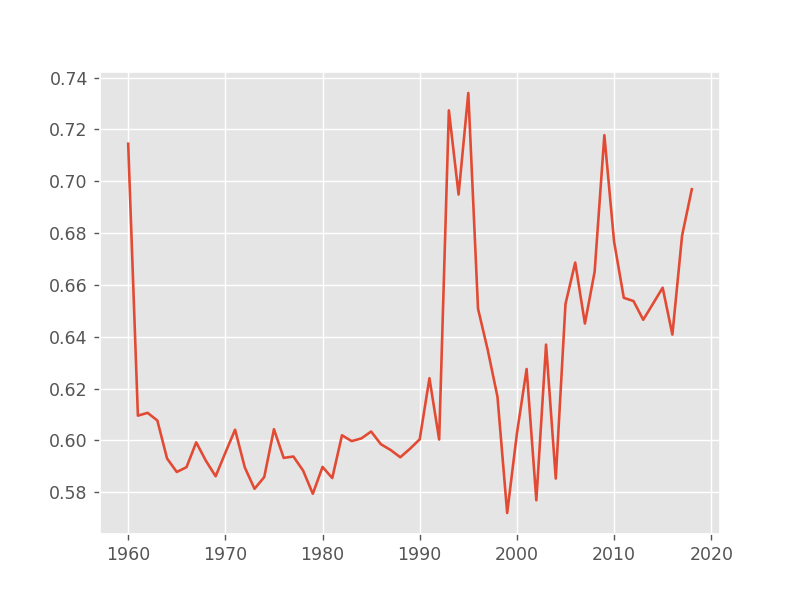

In [72]:
%matplotlib notebook
(total_scrap_demand_all_life.loc[1960:].sum(axis=1)/direct_melt_demand.loc[1960:,:].sum(axis=1)).plot()

## Exporting so we don't have to run those again

In [ ]:
import pickle
import shelve

filename='shelve.out'
my_shelf = shelve.open(filename,'n') # 'n' for new

for key in globals():
    try:
        my_shelf[key] = globals()[key]
    except:
        #
        # __builtins__, my_shelf, and imported modules can not be shelved.
        #
#         print('ERROR shelving: {0}'.format(key))
        pass
my_shelf.close()

In [84]:
ref_stats.loc[pd.datetime(2018, 1, 1), 'Secondary production']/scrap_to_cathode_eff


0

In [82]:
# use_product_all_life.mul(product_to_cathode_alloy.loc[:, 'Alloyed']).sum(axis=1)
# use_product_all_life.mul(product_to_cathode_alloy.loc[:, 'Alloyed'])
# product_to_cathode_alloy
# # refined_scrap_demand
# all_scrap_available.loc[:,'Unalloyed':].sum(axis=1)/waste_all_life.sum(axis=1)
# direct_melt_demand # 2018-2040
# all_scrap_available # 1912-2018
# direct_melt_scrap_demand # 1912-2018
# total_unalloyed
direct_melt_demand

,Ref_Cu,Ref_Zn,Ref_Pb,Ref_Sn,Ref_Ni,Ref_Al,Ref_Mn,Ref_Fe,Yellow_Brass,Pb_Yellow_Brass,Red_Brass,Mn_Bronze,Al_Bronze,Sn_Bronze,Pb_Sn_Bronze,Ni_Ag,Ocean,Cartridge,No.1,No.2
1960,255.642604,251.520623,21.220986,11.743643,23.549361,16.731134,7.259830,12.194010,60.406862,0.110415,12.584763,0.000000,0.000000,0.000000,0.000000,0.320586,33.978860,5.033905,544.920236,-0.0
1961,485.027602,266.661487,22.291302,12.340409,24.768411,17.580591,7.629593,12.814441,63.519010,0.116029,13.233127,0.000000,0.000000,0.000000,0.000000,0.336889,35.729443,5.293251,354.647804,-0.0
1962,493.543884,272.789528,22.800202,12.623282,25.341446,17.982991,7.804098,13.107943,64.984247,0.118677,13.538385,0.000000,0.000000,0.000000,0.000000,0.344575,36.553639,5.415354,365.536389,-0.0
1963,514.994217,283.914085,23.738262,13.139574,26.366324,18.719516,8.122114,13.643875,67.628338,0.123513,14.089237,0.000000,0.000000,0.000000,0.000000,0.358617,38.040940,5.635695,379.000477,-0.0
1964,606.596798,324.690491,27.227239,15.010907,30.006080,21.314728,9.250356,15.537476,73.753329,0.140696,16.033332,0.000000,0.000000,0.000000,0.000000,0.408508,41.686664,6.413333,413.659978,-0.0
1965,648.879846,346.100943,29.204743,16.042863,31.953780,22.705486,9.852677,16.550407,78.548613,0.149855,17.075785,0.000000,0.000000,0.000000,0.000000,0.435102,42.689464,6.830314,438.851085,-0.0
1966,659.247163,363.537208,30.636863,16.828446,33.520008,23.817294,10.332954,17.361459,80.614463,0.157143,17.914325,0.000000,0.000000,0.000000,0.000000,0.456262,44.785813,7.165730,483.265945,-0.0
1967,641.794192,348.911527,29.336748,16.169919,32.298464,22.962445,9.961793,16.735333,81.144764,0.151514,17.264843,0.000000,0.000000,0.000000,0.000000,0.439917,44.888593,6.905937,455.791865,-0.0
1968,716.645915,383.627493,32.181276,17.739191,35.442510,25.189593,10.928169,18.360173,87.137560,0.166201,18.942948,0.000000,0.000000,0.000000,0.000000,0.482562,49.251664,7.577179,488.728055,-0.0
1969,786.783502,416.565051,35.116555,19.281921,38.374946,27.291484,11.841471,19.892938,92.304529,0.180122,20.512118,0.000000,0.000000,0.000000,0.000000,0.522980,51.280294,8.204847,521.007785,-0.0


# Simulation

In [10]:
waste_from_old_history.loc[2018,:].sum()

7665.902294496511

Some tuning parameters
1. **sec_coef**, describes to what extent secondary refinery capacity growth follows scrap supply
2. **open_parameter**, how many mines to assess for opening possibility
3. **sp2_sd_elas**, The elasticity of SP2 to scrap S-D. This is not estimated through regression, value just assigned

## Scenario parameters

Baseline:
Closing method is max, closing year back for max is 10

In [4]:
sort_eff_series=pd.DataFrame(np.array((list(sort_eff)*23)).reshape(23, 6), index=np.arange(2018, 2041), columns=sort_eff.index)
sec_coef=0
sp2_sd_elas=0.0845

Scenario John_1yr_scrap
1. Set recycling technical efficiency to values from Opportunity.xlsx that give scrap supply increase of 2591.748
2. Set recycling collection rate to values from same (both take effect for 2019 only)

In [23]:
sort_eff_series=pd.DataFrame(np.array((list(sort_eff)*23)).reshape(23, 6), index=np.arange(2018, 2041), columns=sort_eff.index)
sort_eff_series.loc[2019,'MSW']=0.7
sort_eff_series.loc[2019,'ELV']=0.85
sort_eff_series.loc[2019,'INEW']=0.35
collect_rate_series=pd.DataFrame(np.array((list(collect_rate)*23)).reshape(23, 6), index=np.arange(2018, 2041), columns=collect_rate.index)
collect_rate_series.loc[2019,'C&D']=0.92
collect_rate_series.loc[2019,'MSW']=0.73
collect_rate_series.loc[2019,'WEEE']=0.75
collect_rate_series.loc[2019,'ELV']=0.96
collect_rate_series.loc[2019,'IEW']=0.86
collect_rate_series.loc[2019,'INEW']=0.88
sec_coef=0
sp2_sd_elas=0.0845

Scenario John_4yr_scrap
1. Set recycling technical efficiency to values from Opportunity.xlsx that give scrap supply increase of 504.424 (no changes from original needed) - thought this was for 5 years but it worked well for 4 after some trial and error
2. Set recycling collection rate to values from same (both take effect for 2019-2022, 4 years)
3. In theory, when compared with John_1yr the scrap supply increase should be very similar, allowing comparison of displacement rates for the same quantities of scrap distributed differently across time

In [17]:
sort_eff_series=pd.DataFrame(np.array((list(sort_eff)*23)).reshape(23, 6), index=np.arange(2018, 2041), columns=sort_eff.index)
collect_rate_series=pd.DataFrame(np.array((list(collect_rate)*23)).reshape(23, 6), index=np.arange(2018, 2041), columns=collect_rate.index)
collect_rate_series.loc[np.arange(2019,2023),'C&D']=0.76
collect_rate_series.loc[np.arange(2019,2023),'MSW']=0.23
collect_rate_series.loc[np.arange(2019,2023),'WEEE']=0.68 #0.65 originally, adjusted to try and get final numbers the same after doing both simulations
collect_rate_series.loc[np.arange(2019,2023),'ELV']=0.96
collect_rate_series.loc[np.arange(2019,2023),'IEW']=0.71 #0.70 originally
collect_rate_series.loc[np.arange(2019,2023),'INEW']=0.85
sec_coef=0
sp2_sd_elas=0.0845

Scenario John_1yrX2_scrap

In [27]:
sort_eff_series=pd.DataFrame(np.array((list(sort_eff)*23)).reshape(23, 6), index=np.arange(2018, 2041), columns=sort_eff.index)
sort_eff_series.loc[2019,'C&D':'INEW'] = [0.9,0.8,0.75,0.85,0.75,0.7]
collect_rate_series=pd.DataFrame(np.array((list(collect_rate)*23)).reshape(23, 6), index=np.arange(2018, 2041), columns=collect_rate.index)
collect_rate_series.loc[2019,'C&D':'INEW']=[0.92,0.85,0.95,0.96,0.95,0.92]
sec_coef=0
sp2_sd_elas=0.0845

### Constant Shocks
###### Constant Shock, Varying Duration - Initial

1. Scenario constshockinit_5yr

In [49]:
sort_eff_series=pd.DataFrame(np.array((list(sort_eff)*23)).reshape(23, 6), index=np.arange(2018, 2041), columns=sort_eff.index)
sort_eff_series.loc[2019:2023,'C&D':'INEW'] = [0.9,0.55,0.55,0.7,0.75,0.2]
collect_rate_series=pd.DataFrame(np.array((list(collect_rate)*23)).reshape(23, 6), index=np.arange(2018, 2041), columns=collect_rate.index)
collect_rate_series.loc[2019:2023,'C&D':'INEW']=[0.80,0.51,0.70,0.96,0.74,0.8]
sec_coef=0
sp2_sd_elas=0.0845

2. Scenario constshockinit_10yr

In [56]:
sort_eff_series=pd.DataFrame(np.array((list(sort_eff)*23)).reshape(23, 6), index=np.arange(2018, 2041), columns=sort_eff.index)
sort_eff_series.loc[2019:2028,'C&D':'INEW'] = [0.9,0.55,0.55,0.7,0.75,0.2]
collect_rate_series=pd.DataFrame(np.array((list(collect_rate)*23)).reshape(23, 6), index=np.arange(2018, 2041), columns=collect_rate.index)
collect_rate_series.loc[2019:2028,'C&D':'INEW']=[0.75,0.27,0.68,0.94,0.69,0.74]
sec_coef=0
sp2_sd_elas=0.0845

3. Scenario constshockinit_20yr

In [94]:
sort_eff_series=pd.DataFrame(np.array((list(sort_eff)*23)).reshape(23, 6), index=np.arange(2018, 2041), columns=sort_eff.index)
sort_eff_series.loc[2019:2038,'C&D':'INEW'] = [0.9,0.55,0.55,0.7,0.75,0.2]
collect_rate_series=pd.DataFrame(np.array((list(collect_rate)*23)).reshape(23, 6), index=np.arange(2018, 2041), columns=collect_rate.index)
collect_rate_series.loc[2019:2038,'C&D':'INEW']=[0.74,0.08,0.64,0.93,0.68,0.70]
sec_coef=0
sp2_sd_elas=0.0845
print(str(datetime.now()))

2019-07-31 10:14:31.253993


###### Constant Shock, Varying Duration - Total

1. Scenario constshocktot_5yr

In [76]:
sort_eff_series=pd.DataFrame(np.array((list(sort_eff)*23)).reshape(23, 6), index=np.arange(2018, 2041), columns=sort_eff.index)
sort_eff_series.loc[2019:2023,'C&D':'INEW'] = [0.9,0.55,0.55,0.7,0.75,0.2]
collect_rate_series=pd.DataFrame(np.array((list(collect_rate)*23)).reshape(23, 6), index=np.arange(2018, 2041), columns=collect_rate.index)
collect_rate_series.loc[2019:2023,'C&D':'INEW']=[0.80,0.44,0.70,0.96,0.74,0.8]
sec_coef=0
sp2_sd_elas=0.0845
print(str(datetime.now()))

2019-07-30 16:52:49.958842


2. Scenario constshocktot_10yr

In [88]:
sort_eff_series=pd.DataFrame(np.array((list(sort_eff)*23)).reshape(23, 6), index=np.arange(2018, 2041), columns=sort_eff.index)
sort_eff_series.loc[2019:2028,'C&D':'INEW'] = [0.9,0.55,0.55,0.7,0.75,0.2]
collect_rate_series=pd.DataFrame(np.array((list(collect_rate)*23)).reshape(23, 6), index=np.arange(2018, 2041), columns=collect_rate.index)
collect_rate_series.loc[2019:2028,'C&D':'INEW']=[0.75,0.16,0.68,0.94,0.69,0.74]
sec_coef=0
sp2_sd_elas=0.0845
print(str(datetime.now()))

2019-07-31 09:37:42.019016


3. Scenario constshocktot_20yr

In [ ]:
sort_eff_series=pd.DataFrame(np.array((list(sort_eff)*23)).reshape(23, 6), index=np.arange(2018, 2041), columns=sort_eff.index)
sort_eff_series.loc[2019:2038,'C&D':'INEW'] = [0.9,0.55,0.55,0.7,0.75,0.2]
collect_rate_series=pd.DataFrame(np.array((list(collect_rate)*23)).reshape(23, 6), index=np.arange(2018, 2041), columns=collect_rate.index)
collect_rate_series.loc[2019:2038,'C&D':'INEW']=[0.74,0.1,0.65,0.94,0.68,0.70]
sec_coef=0
sp2_sd_elas=0.0845
print(str(datetime.now()))

### Linear Ramps to Shock
###### 100% Linear Shock Increase, Varying Time Elapsed to Base Shock 
1. Increasing the sorting efficiency (technical efficiency) and collection rate up to the base shock value calculated (~2600) in Opportunity.xlsx
2. Doing so over the course of 1 year, 5 years, 10 years, and 20 years

1. Scenario linshock1yr

In [4]:
sort_eff_series=pd.DataFrame(np.array((list(sort_eff)*23)).reshape(23, 6), index=np.arange(2018, 2041), columns=sort_eff.index)
collect_rate_series=pd.DataFrame(np.array((list(collect_rate)*23)).reshape(23, 6), index=np.arange(2018, 2041), columns=collect_rate.index)

sort_eff_series.loc[2019:,'C&D':'INEW'] = [0.9,0.7,0.55,0.85,0.75,0.35]
collect_rate_series.loc[2019:,'C&D':'INEW']=[0.92,0.73,0.75,0.96,0.86,0.88]

sec_coef=0
sp2_sd_elas=0.0845
print(str(datetime.now()))

2019-08-14 14:29:00.379594


2. Scenario linshock5yr

In [95]:
sort_eff_series=pd.DataFrame(np.array((list(sort_eff)*23)).reshape(23, 6), index=np.arange(2018, 2041), columns=sort_eff.index)
collect_rate_series=pd.DataFrame(np.array((list(collect_rate)*23)).reshape(23, 6), index=np.arange(2018, 2041), columns=collect_rate.index)

sort_eff_series.loc[2018:2023,'MSW'] = np.linspace(0.55,0.70,6)
sort_eff_series.loc[2018:2023,'ELV'] = np.linspace(0.70,0.85,6)
sort_eff_series.loc[2018:2023,'INEW'] = np.linspace(0.20,0.35,6)

collect_rate_series.loc[2018:2023,'C&D'] = np.linspace(0.72,0.92,6)
collect_rate_series.loc[2018:2023,'MSW'] = np.linspace(0.05,0.73,6)
collect_rate_series.loc[2018:2023,'WEEE'] = np.linspace(0.63,0.75,6)
collect_rate_series.loc[2018:2023,'ELV'] = np.linspace(0.91,0.96,6)
collect_rate_series.loc[2018:2023,'IEW'] = np.linspace(0.66,0.86,6)
collect_rate_series.loc[2018:2023,'INEW'] = np.linspace(0.68,0.88,6)

sort_eff_series.loc[2024:,:] = [0.9,0.7,0.55,0.85,0.75,0.35]
collect_rate_series.loc[2024:,:]=[0.92,0.73,0.75,0.96,0.86,0.88]

sec_coef=0
sp2_sd_elas=0.0845
print(str(datetime.now()))

2019-08-14 14:06:40.974713


3. Scenario linshock10yr

In [4]:
sort_eff_series=pd.DataFrame(np.array((list(sort_eff)*23)).reshape(23, 6), index=np.arange(2018, 2041), columns=sort_eff.index)
collect_rate_series=pd.DataFrame(np.array((list(collect_rate)*23)).reshape(23, 6), index=np.arange(2018, 2041), columns=collect_rate.index)

sort_eff_series.loc[2018:2028,'MSW'] = np.linspace(0.55,0.70,11)
sort_eff_series.loc[2018:2028,'ELV'] = np.linspace(0.70,0.85,11)
sort_eff_series.loc[2018:2028,'INEW'] = np.linspace(0.20,0.35,11)

collect_rate_series.loc[2018:2028,'C&D'] = np.linspace(0.72,0.92,11)
collect_rate_series.loc[2018:2028,'MSW'] = np.linspace(0.05,0.73,11)
collect_rate_series.loc[2018:2028,'WEEE'] = np.linspace(0.63,0.75,11)
collect_rate_series.loc[2018:2028,'ELV'] = np.linspace(0.91,0.96,11)
collect_rate_series.loc[2018:2028,'IEW'] = np.linspace(0.66,0.86,11)
collect_rate_series.loc[2018:2028,'INEW'] = np.linspace(0.68,0.88,11)

sort_eff_series.loc[2028:,:] = [0.9,0.7,0.55,0.85,0.75,0.35]
collect_rate_series.loc[2028:,:]=[0.92,0.73,0.75,0.96,0.86,0.88]

sec_coef=0
sp2_sd_elas=0.0845
print(str(datetime.now()))

2019-08-14 15:37:13.212755


4. Scenario linshock20yr

In [22]:
sort_eff_series=pd.DataFrame(np.array((list(sort_eff)*23)).reshape(23, 6), index=np.arange(2018, 2041), columns=sort_eff.index)
collect_rate_series=pd.DataFrame(np.array((list(collect_rate)*23)).reshape(23, 6), index=np.arange(2018, 2041), columns=collect_rate.index)

sort_eff_series.loc[2018:2038,'MSW'] = np.linspace(0.55,0.70,21)
sort_eff_series.loc[2018:2038,'ELV'] = np.linspace(0.70,0.85,21)
sort_eff_series.loc[2018:2038,'INEW'] = np.linspace(0.20,0.35,21)

collect_rate_series.loc[2018:2038,'C&D'] = np.linspace(0.72,0.92,21)
collect_rate_series.loc[2018:2038,'MSW'] = np.linspace(0.05,0.73,21)
collect_rate_series.loc[2018:2038,'WEEE'] = np.linspace(0.63,0.75,21)
collect_rate_series.loc[2018:2038,'ELV'] = np.linspace(0.91,0.96,21)
collect_rate_series.loc[2018:2038,'IEW'] = np.linspace(0.66,0.86,21)
collect_rate_series.loc[2018:2038,'INEW'] = np.linspace(0.68,0.88,21)

sort_eff_series.loc[2038:,:] = [0.9,0.7,0.55,0.85,0.75,0.35]
collect_rate_series.loc[2038:,:]=[0.92,0.73,0.75,0.96,0.86,0.88]

sec_coef=0
sp2_sd_elas=0.0845
print(str(datetime.now()))

2019-08-09 09:59:57.010396


###### 20% Linear Shock Increase, Varying Time Elapsed to Base Shock 
1. Increasing the sorting efficiency (technical efficiency) and collection rate up to 20% of the base shock value calculated (~504 kt) in Opportunity.xlsx
2. Doing so over the course of 1 year, 5 years, 10 years, and 20 years

1. Scenario linshock1yr20

In [4]:
sort_eff_series=pd.DataFrame(np.array((list(sort_eff)*23)).reshape(23, 6), index=np.arange(2018, 2041), columns=sort_eff.index)
collect_rate_series=pd.DataFrame(np.array((list(collect_rate)*23)).reshape(23, 6), index=np.arange(2018, 2041), columns=collect_rate.index)

sort_eff_series.loc[2019:,'C&D':'INEW'] = [0.9,0.55,0.55,0.7,0.75,0.2]
collect_rate_series.loc[2019:,'C&D':'INEW']=[0.76,0.23,0.65,0.96,0.7,0.85]

sec_coef=0
sp2_sd_elas=0.0845
print(str(datetime.now()))

2019-08-05 15:17:34.889835


2. Scenario linshock5yr20

In [16]:
sort_eff_series=pd.DataFrame(np.array((list(sort_eff)*23)).reshape(23, 6), index=np.arange(2018, 2041), columns=sort_eff.index)
collect_rate_series=pd.DataFrame(np.array((list(collect_rate)*23)).reshape(23, 6), index=np.arange(2018, 2041), columns=collect_rate.index)

collect_rate_series.loc[2018:2023,'C&D'] = np.linspace(0.72,0.76,6)
collect_rate_series.loc[2018:2023,'MSW'] = np.linspace(0.05,0.23,6)
collect_rate_series.loc[2018:2023,'WEEE'] = np.linspace(0.63,0.65,6)
collect_rate_series.loc[2018:2023,'ELV'] = np.linspace(0.91,0.96,6)
collect_rate_series.loc[2018:2023,'IEW'] = np.linspace(0.66,0.70,6)
collect_rate_series.loc[2018:2023,'INEW'] = np.linspace(0.68,0.85,6)

collect_rate_series.loc[2024:,:]=[0.76,0.23,0.65,0.96,0.70,0.85]

sec_coef=0
sp2_sd_elas=0.0845
print(str(datetime.now()))

2019-08-05 16:14:54.619981


3. Scenario linshock10yr20

In [22]:
sort_eff_series=pd.DataFrame(np.array((list(sort_eff)*23)).reshape(23, 6), index=np.arange(2018, 2041), columns=sort_eff.index)
collect_rate_series=pd.DataFrame(np.array((list(collect_rate)*23)).reshape(23, 6), index=np.arange(2018, 2041), columns=collect_rate.index)

collect_rate_series.loc[2018:2028,'C&D'] = np.linspace(0.72,0.76,11)
collect_rate_series.loc[2018:2028,'MSW'] = np.linspace(0.05,0.23,11)
collect_rate_series.loc[2018:2028,'WEEE'] = np.linspace(0.63,0.65,11)
collect_rate_series.loc[2018:2028,'ELV'] = np.linspace(0.91,0.96,11)
collect_rate_series.loc[2018:2028,'IEW'] = np.linspace(0.66,0.70,11)
collect_rate_series.loc[2018:2028,'INEW'] = np.linspace(0.68,0.85,11)

collect_rate_series.loc[2029:,:]=[0.76,0.23,0.65,0.96,0.70,0.85]

sec_coef=0
sp2_sd_elas=0.0845
print(str(datetime.now()))

2019-08-05 16:27:16.186724


4. Scenario linshock20yr20

In [28]:
sort_eff_series=pd.DataFrame(np.array((list(sort_eff)*23)).reshape(23, 6), index=np.arange(2018, 2041), columns=sort_eff.index)
collect_rate_series=pd.DataFrame(np.array((list(collect_rate)*23)).reshape(23, 6), index=np.arange(2018, 2041), columns=collect_rate.index)

collect_rate_series.loc[2018:2038,'C&D'] = np.linspace(0.72,0.76,21)
collect_rate_series.loc[2018:2038,'MSW'] = np.linspace(0.05,0.23,21)
collect_rate_series.loc[2018:2038,'WEEE'] = np.linspace(0.63,0.65,21)
collect_rate_series.loc[2018:2038,'ELV'] = np.linspace(0.91,0.96,21)
collect_rate_series.loc[2018:2038,'IEW'] = np.linspace(0.66,0.70,21)
collect_rate_series.loc[2018:2038,'INEW'] = np.linspace(0.68,0.85,21)

collect_rate_series.loc[2039:,:]=[0.76,0.23,0.65,0.96,0.70,0.85]


sec_coef=0
sp2_sd_elas=0.0845
print(str(datetime.now()))

2019-08-05 16:48:48.369091


###### 50% Linear Shock Increase, Varying Time Elapsed to Base Shock
1. Increasing the sorting efficiency (technical efficiency) and collection rate up to 50% of the base shock value calculated (~1298 kt) in Opportunity.xlsx
2. Doing so over the course of 1 year, 5 years, 10 years, and 20 years

1. Scenario linshock1yr50

In [30]:
sort_eff_series=pd.DataFrame(np.array((list(sort_eff)*23)).reshape(23, 6), index=np.arange(2018, 2041), columns=sort_eff.index)
collect_rate_series=pd.DataFrame(np.array((list(collect_rate)*23)).reshape(23, 6), index=np.arange(2018, 2041), columns=collect_rate.index)

sort_eff_series.loc[2019:,'C&D':'INEW'] = [0.9,0.55,0.55,0.75,0.75,0.3]
collect_rate_series.loc[2019:,'C&D':'INEW']=[0.82,0.49,0.69,0.97,0.76,0.74]

sec_coef=0
sp2_sd_elas=0.0845
print(str(datetime.now()))

2019-08-07 16:00:05.975604


2. Scenario linshock5yr50

In [36]:
sort_eff_series=pd.DataFrame(np.array((list(sort_eff)*23)).reshape(23, 6), index=np.arange(2018, 2041), columns=sort_eff.index)
collect_rate_series=pd.DataFrame(np.array((list(collect_rate)*23)).reshape(23, 6), index=np.arange(2018, 2041), columns=collect_rate.index)

sort_eff_series.loc[2018:2023,'ELV'] = np.linspace(0.70,0.75,6)
sort_eff_series.loc[2018:2023,'INEW'] = np.linspace(0.20,0.3,6)

collect_rate_series.loc[2018:2023,'C&D'] = np.linspace(0.72,0.82,6)
collect_rate_series.loc[2018:2023,'MSW'] = np.linspace(0.05,0.49,6)
collect_rate_series.loc[2018:2023,'WEEE'] = np.linspace(0.63,0.69,6)
collect_rate_series.loc[2018:2023,'ELV'] = np.linspace(0.91,0.97,6)
collect_rate_series.loc[2018:2023,'IEW'] = np.linspace(0.66,0.76,6)
collect_rate_series.loc[2018:2023,'INEW'] = np.linspace(0.68,0.74,6)

collect_rate_series.loc[2024:,'C&D':'INEW']=[0.82,0.49,0.69,0.97,0.76,0.74]

sec_coef=0
sp2_sd_elas=0.0845
print(str(datetime.now()))

2019-08-07 16:09:38.816599


3. Scenario linshock10yr50

In [42]:
sort_eff_series=pd.DataFrame(np.array((list(sort_eff)*23)).reshape(23, 6), index=np.arange(2018, 2041), columns=sort_eff.index)
collect_rate_series=pd.DataFrame(np.array((list(collect_rate)*23)).reshape(23, 6), index=np.arange(2018, 2041), columns=collect_rate.index)

sort_eff_series.loc[2018:2028,'ELV'] = np.linspace(0.70,0.75,11)
sort_eff_series.loc[2018:2028,'INEW'] = np.linspace(0.20,0.3,11)

collect_rate_series.loc[2018:2028,'C&D'] = np.linspace(0.72,0.82,11)
collect_rate_series.loc[2018:2028,'MSW'] = np.linspace(0.05,0.49,11)
collect_rate_series.loc[2018:2028,'WEEE'] = np.linspace(0.63,0.69,11)
collect_rate_series.loc[2018:2028,'ELV'] = np.linspace(0.91,0.97,11)
collect_rate_series.loc[2018:2028,'IEW'] = np.linspace(0.66,0.76,11)
collect_rate_series.loc[2018:2028,'INEW'] = np.linspace(0.68,0.74,11)

collect_rate_series.loc[2029:,'C&D':'INEW']=[0.82,0.49,0.69,0.97,0.76,0.74]

sec_coef=0
sp2_sd_elas=0.0845
print(str(datetime.now()))

2019-08-07 16:18:32.191392


4. Scenario linshock20yr50

In [48]:
sort_eff_series=pd.DataFrame(np.array((list(sort_eff)*23)).reshape(23, 6), index=np.arange(2018, 2041), columns=sort_eff.index)
collect_rate_series=pd.DataFrame(np.array((list(collect_rate)*23)).reshape(23, 6), index=np.arange(2018, 2041), columns=collect_rate.index)

sort_eff_series.loc[2018:2038,'ELV'] = np.linspace(0.70,0.75,21)
sort_eff_series.loc[2018:2038,'INEW'] = np.linspace(0.20,0.3,21)

collect_rate_series.loc[2018:2038,'C&D'] = np.linspace(0.72,0.82,21)
collect_rate_series.loc[2018:2038,'MSW'] = np.linspace(0.05,0.49,21)
collect_rate_series.loc[2018:2038,'WEEE'] = np.linspace(0.63,0.69,21)
collect_rate_series.loc[2018:2038,'ELV'] = np.linspace(0.91,0.97,21)
collect_rate_series.loc[2018:2038,'IEW'] = np.linspace(0.66,0.76,21)
collect_rate_series.loc[2018:2038,'INEW'] = np.linspace(0.68,0.74,21)

collect_rate_series.loc[2039:,'C&D':'INEW']=[0.82,0.49,0.69,0.97,0.76,0.74]

sec_coef=0
sp2_sd_elas=0.0845
print(str(datetime.now()))

2019-08-07 16:29:00.826174


###### 10% Linear Shock Increase, Varying Time Elapsed to Base Shock
1. Increasing the sorting efficiency (technical efficiency) and collection rate up to 10% of the base shock value calculated (~261 kt) in Opportunity.xlsx
2. Doing so over the course of 1 year, 5 years, 10 years, and 20 years

1. Scenario linshock1yr10

In [17]:
sort_eff_series=pd.DataFrame(np.array((list(sort_eff)*23)).reshape(23, 6), index=np.arange(2018, 2041), columns=sort_eff.index)
collect_rate_series=pd.DataFrame(np.array((list(collect_rate)*23)).reshape(23, 6), index=np.arange(2018, 2041), columns=collect_rate.index)

collect_rate_series.loc[2019:,'C&D':'INEW']=[0.74,0.14,0.64,0.94,0.68,0.77]

sec_coef=0
sp2_sd_elas=0.0845
print(str(datetime.now()))

2019-08-14 15:06:15.846025


2. Scenario linshock5yr10

In [11]:
sort_eff_series=pd.DataFrame(np.array((list(sort_eff)*23)).reshape(23, 6), index=np.arange(2018, 2041), columns=sort_eff.index)
collect_rate_series=pd.DataFrame(np.array((list(collect_rate)*23)).reshape(23, 6), index=np.arange(2018, 2041), columns=collect_rate.index)

collect_rate_series.loc[2018:2023,'C&D'] = np.linspace(0.72,0.74,6)
collect_rate_series.loc[2018:2023,'MSW'] = np.linspace(0.05,0.14,6)
collect_rate_series.loc[2018:2023,'WEEE'] = np.linspace(0.63,0.64,6)
collect_rate_series.loc[2018:2023,'ELV'] = np.linspace(0.91,0.94,6)
collect_rate_series.loc[2018:2023,'IEW'] = np.linspace(0.66,0.68,6)
collect_rate_series.loc[2018:2023,'INEW'] = np.linspace(0.68,0.77,6)

collect_rate_series.loc[2024:,'C&D':'INEW']=[0.74,0.14,0.64,0.94,0.68,0.77]

sec_coef=0
sp2_sd_elas=0.0845
print(str(datetime.now()))

2019-08-07 14:19:11.244961


3. Scenario linshock10yr10

In [17]:
sort_eff_series=pd.DataFrame(np.array((list(sort_eff)*23)).reshape(23, 6), index=np.arange(2018, 2041), columns=sort_eff.index)
collect_rate_series=pd.DataFrame(np.array((list(collect_rate)*23)).reshape(23, 6), index=np.arange(2018, 2041), columns=collect_rate.index)

collect_rate_series.loc[2018:2028,'C&D'] = np.linspace(0.72,0.74,11)
collect_rate_series.loc[2018:2028,'MSW'] = np.linspace(0.05,0.14,11)
collect_rate_series.loc[2018:2028,'WEEE'] = np.linspace(0.63,0.64,11)
collect_rate_series.loc[2018:2028,'ELV'] = np.linspace(0.91,0.94,11)
collect_rate_series.loc[2018:2028,'IEW'] = np.linspace(0.66,0.68,11)
collect_rate_series.loc[2018:2028,'INEW'] = np.linspace(0.68,0.77,11)

collect_rate_series.loc[2029:,'C&D':'INEW']=[0.74,0.14,0.64,0.94,0.68,0.77]

sec_coef=0
sp2_sd_elas=0.0845
print(str(datetime.now()))

2019-08-07 14:31:25.649740


4. Scenario linshock20yr10

In [24]:
sort_eff_series=pd.DataFrame(np.array((list(sort_eff)*23)).reshape(23, 6), index=np.arange(2018, 2041), columns=sort_eff.index)
collect_rate_series=pd.DataFrame(np.array((list(collect_rate)*23)).reshape(23, 6), index=np.arange(2018, 2041), columns=collect_rate.index)

collect_rate_series.loc[2018:2038,'C&D'] = np.linspace(0.72,0.74,21)
collect_rate_series.loc[2018:2038,'MSW'] = np.linspace(0.05,0.14,21)
collect_rate_series.loc[2018:2038,'WEEE'] = np.linspace(0.63,0.64,21)
collect_rate_series.loc[2018:2038,'ELV'] = np.linspace(0.91,0.94,21)
collect_rate_series.loc[2018:2038,'IEW'] = np.linspace(0.66,0.68,21)
collect_rate_series.loc[2018:2038,'INEW'] = np.linspace(0.68,0.77,21)

collect_rate_series.loc[2039:,'C&D':'INEW']=[0.74,0.14,0.64,0.94,0.68,0.77]

sec_coef=0
sp2_sd_elas=0.0845
print(str(datetime.now()))

2019-08-07 14:48:06.890331


### 100% Refinery Secondary Ratio Spread & TCRC Elasticities, 100% Linear Shock
###### SP2 elas high, 100% Linear Shock Increase, Varying Time Elapsed to Base Shock 
1. Increasing the sorting efficiency (technical efficiency) and collection rate up to the base shock value calculated (~2600) in Opportunity.xlsx
2. Doing so over the course of 1 year, 5 years, 10 years, and 20 years
3. Multiplying the refinery secondary ratio scrap spread and TCRC elasticities by 2

0. Scenario sp2hi_baseline

In [57]:
ref_hyper_param.loc['sec ratio SP2 elas','Value']*=2
ref_hyper_param.loc['sec ratio TCRC elas','Value']*=2

sec_coef=0
sp2_sd_elas=0.0845
print(str(datetime.now()))

2019-08-13 13:50:13.527888


1. Scenario sp2hi1yr

In [51]:
ref_hyper_param.loc['sec ratio SP2 elas','Value']*=2
ref_hyper_param.loc['sec ratio TCRC elas','Value']*=2

sort_eff_series=pd.DataFrame(np.array((list(sort_eff)*23)).reshape(23, 6), index=np.arange(2018, 2041), columns=sort_eff.index)
collect_rate_series=pd.DataFrame(np.array((list(collect_rate)*23)).reshape(23, 6), index=np.arange(2018, 2041), columns=collect_rate.index)

sort_eff_series.loc[2019:,'C&D':'INEW'] = [0.9,0.7,0.55,0.85,0.75,0.35]
collect_rate_series.loc[2019:,'C&D':'INEW']=[0.92,0.73,0.75,0.96,0.86,0.88]

sec_coef=0
sp2_sd_elas=0.0845
print(str(datetime.now()))

2019-08-13 13:41:14.644283


2. Scenario sp2hi5yr

In [36]:
ref_hyper_param.loc['sec ratio SP2 elas','Value']*=2
ref_hyper_param.loc['sec ratio TCRC elas','Value']*=2

sort_eff_series=pd.DataFrame(np.array((list(sort_eff)*23)).reshape(23, 6), index=np.arange(2018, 2041), columns=sort_eff.index)
collect_rate_series=pd.DataFrame(np.array((list(collect_rate)*23)).reshape(23, 6), index=np.arange(2018, 2041), columns=collect_rate.index)

sort_eff_series.loc[2018:2023,'MSW'] = np.linspace(0.55,0.70,6)
sort_eff_series.loc[2018:2023,'ELV'] = np.linspace(0.70,0.85,6)
sort_eff_series.loc[2018:2023,'INEW'] = np.linspace(0.20,0.35,6)

collect_rate_series.loc[2018:2023,'C&D'] = np.linspace(0.72,0.92,6)
collect_rate_series.loc[2018:2023,'MSW'] = np.linspace(0.05,0.73,6)
collect_rate_series.loc[2018:2023,'WEEE'] = np.linspace(0.63,0.75,6)
collect_rate_series.loc[2018:2023,'ELV'] = np.linspace(0.91,0.96,6)
collect_rate_series.loc[2018:2023,'IEW'] = np.linspace(0.66,0.86,6)
collect_rate_series.loc[2018:2023,'INEW'] = np.linspace(0.68,0.88,6)

sort_eff_series.loc[2024:,:] = [0.9,0.7,0.55,0.85,0.75,0.35]
collect_rate_series.loc[2024:,:]=[0.92,0.73,0.75,0.96,0.86,0.88]

sec_coef=0
sp2_sd_elas=0.0845
print(str(datetime.now()))

2019-08-09 15:59:31.826898


3. Scenario sp2hi10yr

In [42]:
ref_hyper_param.loc['sec ratio SP2 elas','Value']*=2
ref_hyper_param.loc['sec ratio TCRC elas','Value']*=2

sort_eff_series=pd.DataFrame(np.array((list(sort_eff)*23)).reshape(23, 6), index=np.arange(2018, 2041), columns=sort_eff.index)
collect_rate_series=pd.DataFrame(np.array((list(collect_rate)*23)).reshape(23, 6), index=np.arange(2018, 2041), columns=collect_rate.index)

sort_eff_series.loc[2018:2028,'MSW'] = np.linspace(0.55,0.70,11)
sort_eff_series.loc[2018:2028,'ELV'] = np.linspace(0.70,0.85,11)
sort_eff_series.loc[2018:2028,'INEW'] = np.linspace(0.20,0.35,11)

collect_rate_series.loc[2018:2028,'C&D'] = np.linspace(0.72,0.92,11)
collect_rate_series.loc[2018:2028,'MSW'] = np.linspace(0.05,0.73,11)
collect_rate_series.loc[2018:2028,'WEEE'] = np.linspace(0.63,0.75,11)
collect_rate_series.loc[2018:2028,'ELV'] = np.linspace(0.91,0.96,11)
collect_rate_series.loc[2018:2028,'IEW'] = np.linspace(0.66,0.86,11)
collect_rate_series.loc[2018:2028,'INEW'] = np.linspace(0.68,0.88,11)

sort_eff_series.loc[2028:,:] = [0.9,0.7,0.55,0.85,0.75,0.35]
collect_rate_series.loc[2028:,:]=[0.92,0.73,0.75,0.96,0.86,0.88]

sec_coef=0
sp2_sd_elas=0.0845
print(str(datetime.now()))

2019-08-09 16:18:26.572796


4. Scenario sp2hi20yr

In [26]:
ref_hyper_param.loc['sec ratio SP2 elas','Value']*=2
ref_hyper_param.loc['sec ratio TCRC elas','Value']*=2

sort_eff_series=pd.DataFrame(np.array((list(sort_eff)*23)).reshape(23, 6), index=np.arange(2018, 2041), columns=sort_eff.index)
collect_rate_series=pd.DataFrame(np.array((list(collect_rate)*23)).reshape(23, 6), index=np.arange(2018, 2041), columns=collect_rate.index)

sort_eff_series.loc[2018:2038,'MSW'] = np.linspace(0.55,0.70,21)
sort_eff_series.loc[2018:2038,'ELV'] = np.linspace(0.70,0.85,21)
sort_eff_series.loc[2018:2038,'INEW'] = np.linspace(0.20,0.35,21)

collect_rate_series.loc[2018:2038,'C&D'] = np.linspace(0.72,0.92,21)
collect_rate_series.loc[2018:2038,'MSW'] = np.linspace(0.05,0.73,21)
collect_rate_series.loc[2018:2038,'WEEE'] = np.linspace(0.63,0.75,21)
collect_rate_series.loc[2018:2038,'ELV'] = np.linspace(0.91,0.96,21)
collect_rate_series.loc[2018:2038,'IEW'] = np.linspace(0.66,0.86,21)
collect_rate_series.loc[2018:2038,'INEW'] = np.linspace(0.68,0.88,21)

sort_eff_series.loc[2038:,:] = [0.9,0.7,0.55,0.85,0.75,0.35]
collect_rate_series.loc[2038:,:]=[0.92,0.73,0.75,0.96,0.86,0.88]

sec_coef=0
sp2_sd_elas=0.0845
print(str(datetime.now()))

2019-08-12 17:21:50.007407


###### SP2 elas low, 100% Linear Shock Increase, Varying Time Elapsed to Base Shock 
1. Increasing the sorting efficiency (technical efficiency) and collection rate up to the base shock value calculated (~2600) in Opportunity.xlsx
2. Doing so over the course of 1 year, 5 years, 10 years, and 20 years
3. Multiplying the refinery secondary ratio scrap spread and TCRC elasticities by 0.5

0. Scenario sp2lo_baseline

In [39]:
ref_hyper_param.loc['sec ratio SP2 elas','Value']*=0.5
ref_hyper_param.loc['sec ratio TCRC elas','Value']*=0.5

sec_coef=0
sp2_sd_elas=0.0845
print(str(datetime.now()))

2019-08-13 10:42:06.036542


1. Scenario sp2lo1yr

In [4]:
ref_hyper_param.loc['sec ratio SP2 elas','Value']*=0.5
ref_hyper_param.loc['sec ratio TCRC elas','Value']*=0.5

sort_eff_series=pd.DataFrame(np.array((list(sort_eff)*23)).reshape(23, 6), index=np.arange(2018, 2041), columns=sort_eff.index)
collect_rate_series=pd.DataFrame(np.array((list(collect_rate)*23)).reshape(23, 6), index=np.arange(2018, 2041), columns=collect_rate.index)

sort_eff_series.loc[2019:,'C&D':'INEW'] = [0.9,0.7,0.55,0.85,0.75,0.35]
collect_rate_series.loc[2019:,'C&D':'INEW']=[0.92,0.73,0.75,0.96,0.86,0.88]

sec_coef=0
sp2_sd_elas=0.0845
print(str(datetime.now()))

2019-08-12 11:38:01.545106


2. Scenario sp2lo5yr

In [60]:
ref_hyper_param.loc['sec ratio SP2 elas','Value']*=0.5
ref_hyper_param.loc['sec ratio TCRC elas','Value']*=0.5

sort_eff_series=pd.DataFrame(np.array((list(sort_eff)*23)).reshape(23, 6), index=np.arange(2018, 2041), columns=sort_eff.index)
collect_rate_series=pd.DataFrame(np.array((list(collect_rate)*23)).reshape(23, 6), index=np.arange(2018, 2041), columns=collect_rate.index)

sort_eff_series.loc[2018:2023,'MSW'] = np.linspace(0.55,0.70,6)
sort_eff_series.loc[2018:2023,'ELV'] = np.linspace(0.70,0.85,6)
sort_eff_series.loc[2018:2023,'INEW'] = np.linspace(0.20,0.35,6)

collect_rate_series.loc[2018:2023,'C&D'] = np.linspace(0.72,0.92,6)
collect_rate_series.loc[2018:2023,'MSW'] = np.linspace(0.05,0.73,6)
collect_rate_series.loc[2018:2023,'WEEE'] = np.linspace(0.63,0.75,6)
collect_rate_series.loc[2018:2023,'ELV'] = np.linspace(0.91,0.96,6)
collect_rate_series.loc[2018:2023,'IEW'] = np.linspace(0.66,0.86,6)
collect_rate_series.loc[2018:2023,'INEW'] = np.linspace(0.68,0.88,6)

sort_eff_series.loc[2024:,:] = [0.9,0.7,0.55,0.85,0.75,0.35]
collect_rate_series.loc[2024:,:]=[0.92,0.73,0.75,0.96,0.86,0.88]

sec_coef=0
sp2_sd_elas=0.0845
print(str(datetime.now()))

2019-08-09 17:21:16.586820


3. Scenario sp2lo10yr

In [10]:
ref_hyper_param.loc['sec ratio SP2 elas','Value']*=0.5
ref_hyper_param.loc['sec ratio TCRC elas','Value']*=0.5

sort_eff_series=pd.DataFrame(np.array((list(sort_eff)*23)).reshape(23, 6), index=np.arange(2018, 2041), columns=sort_eff.index)
collect_rate_series=pd.DataFrame(np.array((list(collect_rate)*23)).reshape(23, 6), index=np.arange(2018, 2041), columns=collect_rate.index)

sort_eff_series.loc[2018:2028,'MSW'] = np.linspace(0.55,0.70,11)
sort_eff_series.loc[2018:2028,'ELV'] = np.linspace(0.70,0.85,11)
sort_eff_series.loc[2018:2028,'INEW'] = np.linspace(0.20,0.35,11)

collect_rate_series.loc[2018:2028,'C&D'] = np.linspace(0.72,0.92,11)
collect_rate_series.loc[2018:2028,'MSW'] = np.linspace(0.05,0.73,11)
collect_rate_series.loc[2018:2028,'WEEE'] = np.linspace(0.63,0.75,11)
collect_rate_series.loc[2018:2028,'ELV'] = np.linspace(0.91,0.96,11)
collect_rate_series.loc[2018:2028,'IEW'] = np.linspace(0.66,0.86,11)
collect_rate_series.loc[2018:2028,'INEW'] = np.linspace(0.68,0.88,11)

sort_eff_series.loc[2028:,:] = [0.9,0.7,0.55,0.85,0.75,0.35]
collect_rate_series.loc[2028:,:]=[0.92,0.73,0.75,0.96,0.86,0.88]

sec_coef=0
sp2_sd_elas=0.0845
print(str(datetime.now()))

2019-08-12 13:06:54.374343


4. Scenario sp2lo20yr

In [16]:
ref_hyper_param.loc['sec ratio SP2 elas','Value']*=0.5
ref_hyper_param.loc['sec ratio TCRC elas','Value']*=0.5

sort_eff_series=pd.DataFrame(np.array((list(sort_eff)*23)).reshape(23, 6), index=np.arange(2018, 2041), columns=sort_eff.index)
collect_rate_series=pd.DataFrame(np.array((list(collect_rate)*23)).reshape(23, 6), index=np.arange(2018, 2041), columns=collect_rate.index)

sort_eff_series.loc[2018:2038,'MSW'] = np.linspace(0.55,0.70,21)
sort_eff_series.loc[2018:2038,'ELV'] = np.linspace(0.70,0.85,21)
sort_eff_series.loc[2018:2038,'INEW'] = np.linspace(0.20,0.35,21)

collect_rate_series.loc[2018:2038,'C&D'] = np.linspace(0.72,0.92,21)
collect_rate_series.loc[2018:2038,'MSW'] = np.linspace(0.05,0.73,21)
collect_rate_series.loc[2018:2038,'WEEE'] = np.linspace(0.63,0.75,21)
collect_rate_series.loc[2018:2038,'ELV'] = np.linspace(0.91,0.96,21)
collect_rate_series.loc[2018:2038,'IEW'] = np.linspace(0.66,0.86,21)
collect_rate_series.loc[2018:2038,'INEW'] = np.linspace(0.68,0.88,21)

sort_eff_series.loc[2038:,:] = [0.9,0.7,0.55,0.85,0.75,0.35]
collect_rate_series.loc[2038:,:]=[0.92,0.73,0.75,0.96,0.86,0.88]

sec_coef=0
sp2_sd_elas=0.0845
print(str(datetime.now()))

2019-08-12 13:21:24.844754


### 20% Refinery Secondary Ratio Spread & TCRC Elasticities, 20% Linear Shock
###### SP2 elas high, 20% Linear Shock Increase, Varying Time Elapsed to Base Shock 
1. Increasing the sorting efficiency (technical efficiency) and collection rate up to 20% of the base shock value calculated (~504 kt) in Opportunity.xlsx
2. Doing so over the course of 1 year, 5 years, 10 years, and 20 years
3. Multiplying the refinery secondary ratio scrap spread and TCRC elasticities by 2

1. Scenario sp2hi1yr20

In [61]:
ref_hyper_param.loc['sec ratio SP2 elas','Value']*=2
ref_hyper_param.loc['sec ratio TCRC elas','Value']*=2

sort_eff_series=pd.DataFrame(np.array((list(sort_eff)*23)).reshape(23, 6), index=np.arange(2018, 2041), columns=sort_eff.index)
collect_rate_series=pd.DataFrame(np.array((list(collect_rate)*23)).reshape(23, 6), index=np.arange(2018, 2041), columns=collect_rate.index)

sort_eff_series.loc[2019:,'C&D':'INEW'] = [0.9,0.55,0.55,0.7,0.75,0.2]
collect_rate_series.loc[2019:,'C&D':'INEW']=[0.76,0.23,0.65,0.96,0.7,0.85]

sec_coef=0
sp2_sd_elas=0.0845
print(str(datetime.now()))

2019-08-14 11:12:11.118602


2. Scenario sp2hi5yr20

In [71]:
ref_hyper_param.loc['sec ratio SP2 elas','Value']*=2
ref_hyper_param.loc['sec ratio TCRC elas','Value']*=2

sort_eff_series=pd.DataFrame(np.array((list(sort_eff)*23)).reshape(23, 6), index=np.arange(2018, 2041), columns=sort_eff.index)
collect_rate_series=pd.DataFrame(np.array((list(collect_rate)*23)).reshape(23, 6), index=np.arange(2018, 2041), columns=collect_rate.index)

collect_rate_series.loc[2018:2023,'C&D'] = np.linspace(0.72,0.76,6)
collect_rate_series.loc[2018:2023,'MSW'] = np.linspace(0.05,0.23,6)
collect_rate_series.loc[2018:2023,'WEEE'] = np.linspace(0.63,0.65,6)
collect_rate_series.loc[2018:2023,'ELV'] = np.linspace(0.91,0.96,6)
collect_rate_series.loc[2018:2023,'IEW'] = np.linspace(0.66,0.70,6)
collect_rate_series.loc[2018:2023,'INEW'] = np.linspace(0.68,0.85,6)

collect_rate_series.loc[2024:,:]=[0.76,0.23,0.65,0.96,0.70,0.85]

sec_coef=0
sp2_sd_elas=0.0845
print(str(datetime.now()))

2019-08-14 11:50:14.216739


3. Scenario sp2hi10yr20

In [77]:
ref_hyper_param.loc['sec ratio SP2 elas','Value']*=2
ref_hyper_param.loc['sec ratio TCRC elas','Value']*=2

sort_eff_series=pd.DataFrame(np.array((list(sort_eff)*23)).reshape(23, 6), index=np.arange(2018, 2041), columns=sort_eff.index)
collect_rate_series=pd.DataFrame(np.array((list(collect_rate)*23)).reshape(23, 6), index=np.arange(2018, 2041), columns=collect_rate.index)

collect_rate_series.loc[2018:2028,'C&D'] = np.linspace(0.72,0.76,11)
collect_rate_series.loc[2018:2028,'MSW'] = np.linspace(0.05,0.23,11)
collect_rate_series.loc[2018:2028,'WEEE'] = np.linspace(0.63,0.65,11)
collect_rate_series.loc[2018:2028,'ELV'] = np.linspace(0.91,0.96,11)
collect_rate_series.loc[2018:2028,'IEW'] = np.linspace(0.66,0.70,11)
collect_rate_series.loc[2018:2028,'INEW'] = np.linspace(0.68,0.85,11)

collect_rate_series.loc[2029:,:]=[0.76,0.23,0.65,0.96,0.70,0.85]

sec_coef=0
sp2_sd_elas=0.0845
print(str(datetime.now()))

2019-08-14 12:18:20.800665


4. Scenario sp2hi20yr20

In [83]:
ref_hyper_param.loc['sec ratio SP2 elas','Value']*=2
ref_hyper_param.loc['sec ratio TCRC elas','Value']*=2

sort_eff_series=pd.DataFrame(np.array((list(sort_eff)*23)).reshape(23, 6), index=np.arange(2018, 2041), columns=sort_eff.index)
collect_rate_series=pd.DataFrame(np.array((list(collect_rate)*23)).reshape(23, 6), index=np.arange(2018, 2041), columns=collect_rate.index)

collect_rate_series.loc[2018:2038,'C&D'] = np.linspace(0.72,0.76,21)
collect_rate_series.loc[2018:2038,'MSW'] = np.linspace(0.05,0.23,21)
collect_rate_series.loc[2018:2038,'WEEE'] = np.linspace(0.63,0.65,21)
collect_rate_series.loc[2018:2038,'ELV'] = np.linspace(0.91,0.96,21)
collect_rate_series.loc[2018:2038,'IEW'] = np.linspace(0.66,0.70,21)
collect_rate_series.loc[2018:2038,'INEW'] = np.linspace(0.68,0.85,21)

collect_rate_series.loc[2039:,:]=[0.76,0.23,0.65,0.96,0.70,0.85]


sec_coef=0
sp2_sd_elas=0.0845
print(str(datetime.now()))

2019-08-14 13:24:31.186957


###### SP2 elas low, 20% Linear Shock Increase, Varying Time Elapsed to Base Shock 
1. Increasing the sorting efficiency (technical efficiency) and collection rate up to 20% of the base shock value calculated (~504 kt) in Opportunity.xlsx
2. Doing so over the course of 1 year, 5 years, 10 years, and 20 years
3. Multiplying the refinery secondary ratio scrap spread and TCRC elasticities by 0.5

1. Scenario sp2lo1yr20

In [4]:
ref_hyper_param.loc['sec ratio SP2 elas','Value']*=0.5
ref_hyper_param.loc['sec ratio TCRC elas','Value']*=0.5

sort_eff_series=pd.DataFrame(np.array((list(sort_eff)*23)).reshape(23, 6), index=np.arange(2018, 2041), columns=sort_eff.index)
collect_rate_series=pd.DataFrame(np.array((list(collect_rate)*23)).reshape(23, 6), index=np.arange(2018, 2041), columns=collect_rate.index)

sort_eff_series.loc[2019:,'C&D':'INEW'] = [0.9,0.55,0.55,0.7,0.75,0.2]
collect_rate_series.loc[2019:,'C&D':'INEW']=[0.76,0.23,0.65,0.96,0.7,0.85]

sec_coef=0
sp2_sd_elas=0.0845
print(str(datetime.now()))

2019-08-05 15:17:34.889835


2. Scenario sp2lo5yr20

In [16]:
ref_hyper_param.loc['sec ratio SP2 elas','Value']*=0.5
ref_hyper_param.loc['sec ratio TCRC elas','Value']*=0.5

sort_eff_series=pd.DataFrame(np.array((list(sort_eff)*23)).reshape(23, 6), index=np.arange(2018, 2041), columns=sort_eff.index)
collect_rate_series=pd.DataFrame(np.array((list(collect_rate)*23)).reshape(23, 6), index=np.arange(2018, 2041), columns=collect_rate.index)

collect_rate_series.loc[2018:2023,'C&D'] = np.linspace(0.72,0.76,6)
collect_rate_series.loc[2018:2023,'MSW'] = np.linspace(0.05,0.23,6)
collect_rate_series.loc[2018:2023,'WEEE'] = np.linspace(0.63,0.65,6)
collect_rate_series.loc[2018:2023,'ELV'] = np.linspace(0.91,0.96,6)
collect_rate_series.loc[2018:2023,'IEW'] = np.linspace(0.66,0.70,6)
collect_rate_series.loc[2018:2023,'INEW'] = np.linspace(0.68,0.85,6)

collect_rate_series.loc[2024:,:]=[0.76,0.23,0.65,0.96,0.70,0.85]

sec_coef=0
sp2_sd_elas=0.0845
print(str(datetime.now()))

2019-08-05 16:14:54.619981


3. Scenario sp2lo10yr20

In [22]:
ref_hyper_param.loc['sec ratio SP2 elas','Value']*=0.5
ref_hyper_param.loc['sec ratio TCRC elas','Value']*=0.5

sort_eff_series=pd.DataFrame(np.array((list(sort_eff)*23)).reshape(23, 6), index=np.arange(2018, 2041), columns=sort_eff.index)
collect_rate_series=pd.DataFrame(np.array((list(collect_rate)*23)).reshape(23, 6), index=np.arange(2018, 2041), columns=collect_rate.index)

collect_rate_series.loc[2018:2028,'C&D'] = np.linspace(0.72,0.76,11)
collect_rate_series.loc[2018:2028,'MSW'] = np.linspace(0.05,0.23,11)
collect_rate_series.loc[2018:2028,'WEEE'] = np.linspace(0.63,0.65,11)
collect_rate_series.loc[2018:2028,'ELV'] = np.linspace(0.91,0.96,11)
collect_rate_series.loc[2018:2028,'IEW'] = np.linspace(0.66,0.70,11)
collect_rate_series.loc[2018:2028,'INEW'] = np.linspace(0.68,0.85,11)

collect_rate_series.loc[2029:,:]=[0.76,0.23,0.65,0.96,0.70,0.85]

sec_coef=0
sp2_sd_elas=0.0845
print(str(datetime.now()))

2019-08-05 16:27:16.186724


4. Scenario sp2lo20yr20

In [28]:
ref_hyper_param.loc['sec ratio SP2 elas','Value']*=0.5
ref_hyper_param.loc['sec ratio TCRC elas','Value']*=0.5

sort_eff_series=pd.DataFrame(np.array((list(sort_eff)*23)).reshape(23, 6), index=np.arange(2018, 2041), columns=sort_eff.index)
collect_rate_series=pd.DataFrame(np.array((list(collect_rate)*23)).reshape(23, 6), index=np.arange(2018, 2041), columns=collect_rate.index)

collect_rate_series.loc[2018:2038,'C&D'] = np.linspace(0.72,0.76,21)
collect_rate_series.loc[2018:2038,'MSW'] = np.linspace(0.05,0.23,21)
collect_rate_series.loc[2018:2038,'WEEE'] = np.linspace(0.63,0.65,21)
collect_rate_series.loc[2018:2038,'ELV'] = np.linspace(0.91,0.96,21)
collect_rate_series.loc[2018:2038,'IEW'] = np.linspace(0.66,0.70,21)
collect_rate_series.loc[2018:2038,'INEW'] = np.linspace(0.68,0.85,21)

collect_rate_series.loc[2039:,:]=[0.76,0.23,0.65,0.96,0.70,0.85]


sec_coef=0
sp2_sd_elas=0.0845
print(str(datetime.now()))

2019-08-05 16:48:48.369091


### Mine Production Elasticity, 20% Linear Shock Increase
###### MPE high, 20% Linear Shock Increase, Varying Time Elapsed to Base Shock 
1. Increasing the sorting efficiency (technical efficiency) and collection rate up to 20% of the base shock value calculated (~504 kt) in Opportunity.xlsx
2. Doing so over the course of 1 year, 5 years, 10 years, and 20 years
3. Multiplying the mine production elasticity (capacity utilization (CU) short run elasticity to TCM) by 2

0. Scenario mpehi_baseline

In [12]:
pri_hyper_param.loc['Production elasticity','Value']*=2

sec_coef=0
sp2_sd_elas=0.0845
print(str(datetime.now()))

2019-08-14 19:45:14.099430


1. Scenario mpehi1yr20

In [4]:
pri_hyper_param.loc['Production elasticity','Value']*=2

sort_eff_series=pd.DataFrame(np.array((list(sort_eff)*23)).reshape(23, 6), index=np.arange(2018, 2041), columns=sort_eff.index)
collect_rate_series=pd.DataFrame(np.array((list(collect_rate)*23)).reshape(23, 6), index=np.arange(2018, 2041), columns=collect_rate.index)

sort_eff_series.loc[2019:,'C&D':'INEW'] = [0.9,0.55,0.55,0.7,0.75,0.2]
collect_rate_series.loc[2019:,'C&D':'INEW']=[0.76,0.23,0.65,0.96,0.7,0.85]

sec_coef=0
sp2_sd_elas=0.0845
print(str(datetime.now()))

2019-08-05 15:17:34.889835


2. Scenario mpehi5yr20

In [39]:
pri_hyper_param.loc['Production elasticity','Value']*=2

sort_eff_series=pd.DataFrame(np.array((list(sort_eff)*23)).reshape(23, 6), index=np.arange(2018, 2041), columns=sort_eff.index)
collect_rate_series=pd.DataFrame(np.array((list(collect_rate)*23)).reshape(23, 6), index=np.arange(2018, 2041), columns=collect_rate.index)

collect_rate_series.loc[2018:2023,'C&D'] = np.linspace(0.72,0.76,6)
collect_rate_series.loc[2018:2023,'MSW'] = np.linspace(0.05,0.23,6)
collect_rate_series.loc[2018:2023,'WEEE'] = np.linspace(0.63,0.65,6)
collect_rate_series.loc[2018:2023,'ELV'] = np.linspace(0.91,0.96,6)
collect_rate_series.loc[2018:2023,'IEW'] = np.linspace(0.66,0.70,6)
collect_rate_series.loc[2018:2023,'INEW'] = np.linspace(0.68,0.85,6)

collect_rate_series.loc[2024:,:]=[0.76,0.23,0.65,0.96,0.70,0.85]

sec_coef=0
sp2_sd_elas=0.0845
print(str(datetime.now()))

2019-08-15 09:46:20.006662


3. Scenario mpehi10yr20

In [22]:
pri_hyper_param.loc['Production elasticity','Value']*=2

sort_eff_series=pd.DataFrame(np.array((list(sort_eff)*23)).reshape(23, 6), index=np.arange(2018, 2041), columns=sort_eff.index)
collect_rate_series=pd.DataFrame(np.array((list(collect_rate)*23)).reshape(23, 6), index=np.arange(2018, 2041), columns=collect_rate.index)

collect_rate_series.loc[2018:2028,'C&D'] = np.linspace(0.72,0.76,11)
collect_rate_series.loc[2018:2028,'MSW'] = np.linspace(0.05,0.23,11)
collect_rate_series.loc[2018:2028,'WEEE'] = np.linspace(0.63,0.65,11)
collect_rate_series.loc[2018:2028,'ELV'] = np.linspace(0.91,0.96,11)
collect_rate_series.loc[2018:2028,'IEW'] = np.linspace(0.66,0.70,11)
collect_rate_series.loc[2018:2028,'INEW'] = np.linspace(0.68,0.85,11)

collect_rate_series.loc[2029:,:]=[0.76,0.23,0.65,0.96,0.70,0.85]

sec_coef=0
sp2_sd_elas=0.0845
print(str(datetime.now()))

2019-08-05 16:27:16.186724


4. Scenario mpehi20yr20

In [28]:
pri_hyper_param.loc['Production elasticity','Value']*=2

sort_eff_series=pd.DataFrame(np.array((list(sort_eff)*23)).reshape(23, 6), index=np.arange(2018, 2041), columns=sort_eff.index)
collect_rate_series=pd.DataFrame(np.array((list(collect_rate)*23)).reshape(23, 6), index=np.arange(2018, 2041), columns=collect_rate.index)

collect_rate_series.loc[2018:2038,'C&D'] = np.linspace(0.72,0.76,21)
collect_rate_series.loc[2018:2038,'MSW'] = np.linspace(0.05,0.23,21)
collect_rate_series.loc[2018:2038,'WEEE'] = np.linspace(0.63,0.65,21)
collect_rate_series.loc[2018:2038,'ELV'] = np.linspace(0.91,0.96,21)
collect_rate_series.loc[2018:2038,'IEW'] = np.linspace(0.66,0.70,21)
collect_rate_series.loc[2018:2038,'INEW'] = np.linspace(0.68,0.85,21)

collect_rate_series.loc[2039:,:]=[0.76,0.23,0.65,0.96,0.70,0.85]


sec_coef=0
sp2_sd_elas=0.0845
print(str(datetime.now()))

2019-08-05 16:48:48.369091


###### MPE elas low, 20% Linear Shock Increase, Varying Time Elapsed to Base Shock 
1. Increasing the sorting efficiency (technical efficiency) and collection rate up to 20% of the base shock value calculated (~504 kt) in Opportunity.xlsx
2. Doing so over the course of 1 year, 5 years, 10 years, and 20 years
3. Multiplying the mine production elasticity (CU short run elasticity to TCM) by 0.5

0. Scenario mpelo_baseline

In [4]:
pri_hyper_param.loc['Production elasticity','Value']*=0.5

sec_coef=0
sp2_sd_elas=0.0845
print(str(datetime.now()))

2019-08-14 19:55:30.942383


1. Scenario mpelo1yr20

In [10]:
pri_hyper_param.loc['Production elasticity','Value']*=0.5

sort_eff_series=pd.DataFrame(np.array((list(sort_eff)*23)).reshape(23, 6), index=np.arange(2018, 2041), columns=sort_eff.index)
collect_rate_series=pd.DataFrame(np.array((list(collect_rate)*23)).reshape(23, 6), index=np.arange(2018, 2041), columns=collect_rate.index)

sort_eff_series.loc[2019:,'C&D':'INEW'] = [0.9,0.55,0.55,0.7,0.75,0.2]
collect_rate_series.loc[2019:,'C&D':'INEW']=[0.76,0.23,0.65,0.96,0.7,0.85]

sec_coef=0
sp2_sd_elas=0.0845
print(str(datetime.now()))

2019-08-14 20:18:22.471551


2. Scenario mpelo5yr20

In [22]:
pri_hyper_param.loc['Production elasticity','Value']*=0.5

sort_eff_series=pd.DataFrame(np.array((list(sort_eff)*23)).reshape(23, 6), index=np.arange(2018, 2041), columns=sort_eff.index)
collect_rate_series=pd.DataFrame(np.array((list(collect_rate)*23)).reshape(23, 6), index=np.arange(2018, 2041), columns=collect_rate.index)

collect_rate_series.loc[2018:2023,'C&D'] = np.linspace(0.72,0.76,6)
collect_rate_series.loc[2018:2023,'MSW'] = np.linspace(0.05,0.23,6)
collect_rate_series.loc[2018:2023,'WEEE'] = np.linspace(0.63,0.65,6)
collect_rate_series.loc[2018:2023,'ELV'] = np.linspace(0.91,0.96,6)
collect_rate_series.loc[2018:2023,'IEW'] = np.linspace(0.66,0.70,6)
collect_rate_series.loc[2018:2023,'INEW'] = np.linspace(0.68,0.85,6)

collect_rate_series.loc[2024:,:]=[0.76,0.23,0.65,0.96,0.70,0.85]

sec_coef=0
sp2_sd_elas=0.0845
print(str(datetime.now()))

2019-08-14 21:27:02.166367


3. Scenario mpelo10yr20

In [16]:
pri_hyper_param.loc['Production elasticity','Value']*=0.5

sort_eff_series=pd.DataFrame(np.array((list(sort_eff)*23)).reshape(23, 6), index=np.arange(2018, 2041), columns=sort_eff.index)
collect_rate_series=pd.DataFrame(np.array((list(collect_rate)*23)).reshape(23, 6), index=np.arange(2018, 2041), columns=collect_rate.index)

collect_rate_series.loc[2018:2028,'C&D'] = np.linspace(0.72,0.76,11)
collect_rate_series.loc[2018:2028,'MSW'] = np.linspace(0.05,0.23,11)
collect_rate_series.loc[2018:2028,'WEEE'] = np.linspace(0.63,0.65,11)
collect_rate_series.loc[2018:2028,'ELV'] = np.linspace(0.91,0.96,11)
collect_rate_series.loc[2018:2028,'IEW'] = np.linspace(0.66,0.70,11)
collect_rate_series.loc[2018:2028,'INEW'] = np.linspace(0.68,0.85,11)

collect_rate_series.loc[2029:,:]=[0.76,0.23,0.65,0.96,0.70,0.85]

sec_coef=0
sp2_sd_elas=0.0845
print(str(datetime.now()))

2019-08-14 20:58:27.600486


4. Scenario mpelo20yr20

In [28]:
pri_hyper_param.loc['Production elasticity','Value']*=0.5

sort_eff_series=pd.DataFrame(np.array((list(sort_eff)*23)).reshape(23, 6), index=np.arange(2018, 2041), columns=sort_eff.index)
collect_rate_series=pd.DataFrame(np.array((list(collect_rate)*23)).reshape(23, 6), index=np.arange(2018, 2041), columns=collect_rate.index)

collect_rate_series.loc[2018:2038,'C&D'] = np.linspace(0.72,0.76,21)
collect_rate_series.loc[2018:2038,'MSW'] = np.linspace(0.05,0.23,21)
collect_rate_series.loc[2018:2038,'WEEE'] = np.linspace(0.63,0.65,21)
collect_rate_series.loc[2018:2038,'ELV'] = np.linspace(0.91,0.96,21)
collect_rate_series.loc[2018:2038,'IEW'] = np.linspace(0.66,0.70,21)
collect_rate_series.loc[2018:2038,'INEW'] = np.linspace(0.68,0.85,21)

collect_rate_series.loc[2039:,:]=[0.76,0.23,0.65,0.96,0.70,0.85]


sec_coef=0
sp2_sd_elas=0.0845
print(str(datetime.now()))

2019-08-14 22:11:55.242350


### Scrap Supply & Demand Elasticity, 20% Linear Shock Increase
###### SSDE high, 20% Linear Shock Increase, Varying Time Elapsed to Base Shock 
1. Increasing the sorting efficiency (technical efficiency) and collection rate up to 20% of the base shock value calculated (~504 kt) in Opportunity.xlsx
2. Doing so over the course of 1 year, 5 years, 10 years, and 20 years
3. Multiplying the scrap supply & demand elasticity (elasticity of scrap spread to scrap S&D effect) by 2

0. Scenario ssdehi_baseline

In [12]:
sp2_sd_elas*=2

sec_coef=0
# sp2_sd_elas=0.0845
print(str(datetime.now()))

2019-08-14 19:45:14.099430


1. Scenario ssdehi1yr20

In [115]:
sp2_sd_elas*=2

sort_eff_series=pd.DataFrame(np.array((list(sort_eff)*23)).reshape(23, 6), index=np.arange(2018, 2041), columns=sort_eff.index)
collect_rate_series=pd.DataFrame(np.array((list(collect_rate)*23)).reshape(23, 6), index=np.arange(2018, 2041), columns=collect_rate.index)

sort_eff_series.loc[2019:,'C&D':'INEW'] = [0.9,0.55,0.55,0.7,0.75,0.2]
collect_rate_series.loc[2019:,'C&D':'INEW']=[0.76,0.23,0.65,0.96,0.7,0.85]

sec_coef=0
# sp2_sd_elas=0.0845
print(str(datetime.now()))

2019-08-16 18:19:58.268860


2. Scenario ssdehi5yr20

In [16]:
sp2_sd_elas*=2

sort_eff_series=pd.DataFrame(np.array((list(sort_eff)*23)).reshape(23, 6), index=np.arange(2018, 2041), columns=sort_eff.index)
collect_rate_series=pd.DataFrame(np.array((list(collect_rate)*23)).reshape(23, 6), index=np.arange(2018, 2041), columns=collect_rate.index)

collect_rate_series.loc[2018:2023,'C&D'] = np.linspace(0.72,0.76,6)
collect_rate_series.loc[2018:2023,'MSW'] = np.linspace(0.05,0.23,6)
collect_rate_series.loc[2018:2023,'WEEE'] = np.linspace(0.63,0.65,6)
collect_rate_series.loc[2018:2023,'ELV'] = np.linspace(0.91,0.96,6)
collect_rate_series.loc[2018:2023,'IEW'] = np.linspace(0.66,0.70,6)
collect_rate_series.loc[2018:2023,'INEW'] = np.linspace(0.68,0.85,6)

collect_rate_series.loc[2024:,:]=[0.76,0.23,0.65,0.96,0.70,0.85]

sec_coef=0
# sp2_sd_elas=0.0845
print(str(datetime.now()))

2019-08-05 16:14:54.619981


3. Scenario ssdehi10yr20

In [22]:
sp2_sd_elas*=2

sort_eff_series=pd.DataFrame(np.array((list(sort_eff)*23)).reshape(23, 6), index=np.arange(2018, 2041), columns=sort_eff.index)
collect_rate_series=pd.DataFrame(np.array((list(collect_rate)*23)).reshape(23, 6), index=np.arange(2018, 2041), columns=collect_rate.index)

collect_rate_series.loc[2018:2028,'C&D'] = np.linspace(0.72,0.76,11)
collect_rate_series.loc[2018:2028,'MSW'] = np.linspace(0.05,0.23,11)
collect_rate_series.loc[2018:2028,'WEEE'] = np.linspace(0.63,0.65,11)
collect_rate_series.loc[2018:2028,'ELV'] = np.linspace(0.91,0.96,11)
collect_rate_series.loc[2018:2028,'IEW'] = np.linspace(0.66,0.70,11)
collect_rate_series.loc[2018:2028,'INEW'] = np.linspace(0.68,0.85,11)

collect_rate_series.loc[2029:,:]=[0.76,0.23,0.65,0.96,0.70,0.85]

sec_coef=0
# sp2_sd_elas=0.0845
print(str(datetime.now()))

2019-08-05 16:27:16.186724


4. Scenario ssdehi20yr20

In [28]:
sp2_sd_elas*=2

sort_eff_series=pd.DataFrame(np.array((list(sort_eff)*23)).reshape(23, 6), index=np.arange(2018, 2041), columns=sort_eff.index)
collect_rate_series=pd.DataFrame(np.array((list(collect_rate)*23)).reshape(23, 6), index=np.arange(2018, 2041), columns=collect_rate.index)

collect_rate_series.loc[2018:2038,'C&D'] = np.linspace(0.72,0.76,21)
collect_rate_series.loc[2018:2038,'MSW'] = np.linspace(0.05,0.23,21)
collect_rate_series.loc[2018:2038,'WEEE'] = np.linspace(0.63,0.65,21)
collect_rate_series.loc[2018:2038,'ELV'] = np.linspace(0.91,0.96,21)
collect_rate_series.loc[2018:2038,'IEW'] = np.linspace(0.66,0.70,21)
collect_rate_series.loc[2018:2038,'INEW'] = np.linspace(0.68,0.85,21)

collect_rate_series.loc[2039:,:]=[0.76,0.23,0.65,0.96,0.70,0.85]


sec_coef=0
# sp2_sd_elas=0.0845
print(str(datetime.now()))

2019-08-05 16:48:48.369091


###### SSDE low, 20% Linear Shock Increase, Varying Time Elapsed to Base Shock 
1. Increasing the sorting efficiency (technical efficiency) and collection rate up to 20% of the base shock value calculated (~504 kt) in Opportunity.xlsx
2. Doing so over the course of 1 year, 5 years, 10 years, and 20 years
3. Multiplying the scrap supply & demand elasticity (elasticity of scrap spread to scrap S&D effect) by 0.5

0. Scenario ssdelo_baseline

In [109]:
sp2_sd_elas*=0.5

sec_coef=0
# sp2_sd_elas=0.0845
print(str(datetime.now()))

2019-08-16 15:56:41.211198


1. Scenario ssdelo1yr20

In [49]:
sp2_sd_elas*=0.5

sort_eff_series=pd.DataFrame(np.array((list(sort_eff)*23)).reshape(23, 6), index=np.arange(2018, 2041), columns=sort_eff.index)
collect_rate_series=pd.DataFrame(np.array((list(collect_rate)*23)).reshape(23, 6), index=np.arange(2018, 2041), columns=collect_rate.index)

sort_eff_series.loc[2019:,'C&D':'INEW'] = [0.9,0.55,0.55,0.7,0.75,0.2]
collect_rate_series.loc[2019:,'C&D':'INEW']=[0.76,0.23,0.65,0.96,0.7,0.85]

sec_coef=0
# sp2_sd_elas=0.0845
print(str(datetime.now()))

2019-08-15 10:15:27.295897


2. Scenario ssdelo5yr20

In [122]:
sp2_sd_elas*=0.5

sort_eff_series=pd.DataFrame(np.array((list(sort_eff)*23)).reshape(23, 6), index=np.arange(2018, 2041), columns=sort_eff.index)
collect_rate_series=pd.DataFrame(np.array((list(collect_rate)*23)).reshape(23, 6), index=np.arange(2018, 2041), columns=collect_rate.index)

collect_rate_series.loc[2018:2023,'C&D'] = np.linspace(0.72,0.76,6)
collect_rate_series.loc[2018:2023,'MSW'] = np.linspace(0.05,0.23,6)
collect_rate_series.loc[2018:2023,'WEEE'] = np.linspace(0.63,0.65,6)
collect_rate_series.loc[2018:2023,'ELV'] = np.linspace(0.91,0.96,6)
collect_rate_series.loc[2018:2023,'IEW'] = np.linspace(0.66,0.70,6)
collect_rate_series.loc[2018:2023,'INEW'] = np.linspace(0.68,0.85,6)

collect_rate_series.loc[2024:,:]=[0.76,0.23,0.65,0.96,0.70,0.85]

sec_coef=0
# sp2_sd_elas=0.0845
print(str(datetime.now()))

2019-08-16 18:34:10.781081


3. Scenario ssdelo10yr20

In [128]:
sp2_sd_elas*=0.5

sort_eff_series=pd.DataFrame(np.array((list(sort_eff)*23)).reshape(23, 6), index=np.arange(2018, 2041), columns=sort_eff.index)
collect_rate_series=pd.DataFrame(np.array((list(collect_rate)*23)).reshape(23, 6), index=np.arange(2018, 2041), columns=collect_rate.index)

collect_rate_series.loc[2018:2028,'C&D'] = np.linspace(0.72,0.76,11)
collect_rate_series.loc[2018:2028,'MSW'] = np.linspace(0.05,0.23,11)
collect_rate_series.loc[2018:2028,'WEEE'] = np.linspace(0.63,0.65,11)
collect_rate_series.loc[2018:2028,'ELV'] = np.linspace(0.91,0.96,11)
collect_rate_series.loc[2018:2028,'IEW'] = np.linspace(0.66,0.70,11)
collect_rate_series.loc[2018:2028,'INEW'] = np.linspace(0.68,0.85,11)

collect_rate_series.loc[2029:,:]=[0.76,0.23,0.65,0.96,0.70,0.85]

sec_coef=0
# sp2_sd_elas=0.0845
print(str(datetime.now()))

2019-08-16 18:53:36.764357


4. Scenario ssdelo20yr20

In [134]:
sp2_sd_elas*=0.5

sort_eff_series=pd.DataFrame(np.array((list(sort_eff)*23)).reshape(23, 6), index=np.arange(2018, 2041), columns=sort_eff.index)
collect_rate_series=pd.DataFrame(np.array((list(collect_rate)*23)).reshape(23, 6), index=np.arange(2018, 2041), columns=collect_rate.index)

collect_rate_series.loc[2018:2038,'C&D'] = np.linspace(0.72,0.76,21)
collect_rate_series.loc[2018:2038,'MSW'] = np.linspace(0.05,0.23,21)
collect_rate_series.loc[2018:2038,'WEEE'] = np.linspace(0.63,0.65,21)
collect_rate_series.loc[2018:2038,'ELV'] = np.linspace(0.91,0.96,21)
collect_rate_series.loc[2018:2038,'IEW'] = np.linspace(0.66,0.70,21)
collect_rate_series.loc[2018:2038,'INEW'] = np.linspace(0.68,0.85,21)

collect_rate_series.loc[2039:,:]=[0.76,0.23,0.65,0.96,0.70,0.85]


sec_coef=0
# sp2_sd_elas=0.0845
print(str(datetime.now()))

2019-08-16 19:13:09.590003


### 400% DE, 20% Linear Shock Increase, Varying Time Elapsed to Base Shock 
###### Demand Elasticity, 20% Linear Shock Increase
###### DE high, 20% Linear Shock Increase, Varying Time Elapsed to Base Shock 
1. Increasing the sorting efficiency (technical efficiency) and collection rate up to 20% of the base shock value calculated (~504 kt) in Opportunity.xlsx
2. Doing so over the course of 1 year, 5 years, 10 years, and 20 years
3. Multiplying the copper demand elasticity to cathode price by 4

0. Scenario ssdehi_baseline

In [12]:
elas_sec_reg.loc['Construction':'ROW','Elasticity mean']*=4

sec_coef=0
sp2_sd_elas=0.0845
print(str(datetime.now()))

2019-08-14 19:45:14.099430


1. Scenario ssdehi1yr20

In [4]:
elas_sec_reg.loc['Construction':'ROW','Elasticity mean']*=4

sort_eff_series=pd.DataFrame(np.array((list(sort_eff)*23)).reshape(23, 6), index=np.arange(2018, 2041), columns=sort_eff.index)
collect_rate_series=pd.DataFrame(np.array((list(collect_rate)*23)).reshape(23, 6), index=np.arange(2018, 2041), columns=collect_rate.index)

sort_eff_series.loc[2019:,'C&D':'INEW'] = [0.9,0.55,0.55,0.7,0.75,0.2]
collect_rate_series.loc[2019:,'C&D':'INEW']=[0.76,0.23,0.65,0.96,0.7,0.85]

sec_coef=0
sp2_sd_elas=0.0845
print(str(datetime.now()))

2019-08-05 15:17:34.889835


2. Scenario ssdehi5yr20

In [16]:
elas_sec_reg.loc['Construction':'ROW','Elasticity mean']*=4

sort_eff_series=pd.DataFrame(np.array((list(sort_eff)*23)).reshape(23, 6), index=np.arange(2018, 2041), columns=sort_eff.index)
collect_rate_series=pd.DataFrame(np.array((list(collect_rate)*23)).reshape(23, 6), index=np.arange(2018, 2041), columns=collect_rate.index)

collect_rate_series.loc[2018:2023,'C&D'] = np.linspace(0.72,0.76,6)
collect_rate_series.loc[2018:2023,'MSW'] = np.linspace(0.05,0.23,6)
collect_rate_series.loc[2018:2023,'WEEE'] = np.linspace(0.63,0.65,6)
collect_rate_series.loc[2018:2023,'ELV'] = np.linspace(0.91,0.96,6)
collect_rate_series.loc[2018:2023,'IEW'] = np.linspace(0.66,0.70,6)
collect_rate_series.loc[2018:2023,'INEW'] = np.linspace(0.68,0.85,6)

collect_rate_series.loc[2024:,:]=[0.76,0.23,0.65,0.96,0.70,0.85]

sec_coef=0
sp2_sd_elas=0.0845
print(str(datetime.now()))

2019-08-05 16:14:54.619981


3. Scenario ssdehi10yr20

In [22]:
elas_sec_reg.loc['Construction':'ROW','Elasticity mean']*=4

sort_eff_series=pd.DataFrame(np.array((list(sort_eff)*23)).reshape(23, 6), index=np.arange(2018, 2041), columns=sort_eff.index)
collect_rate_series=pd.DataFrame(np.array((list(collect_rate)*23)).reshape(23, 6), index=np.arange(2018, 2041), columns=collect_rate.index)

collect_rate_series.loc[2018:2028,'C&D'] = np.linspace(0.72,0.76,11)
collect_rate_series.loc[2018:2028,'MSW'] = np.linspace(0.05,0.23,11)
collect_rate_series.loc[2018:2028,'WEEE'] = np.linspace(0.63,0.65,11)
collect_rate_series.loc[2018:2028,'ELV'] = np.linspace(0.91,0.96,11)
collect_rate_series.loc[2018:2028,'IEW'] = np.linspace(0.66,0.70,11)
collect_rate_series.loc[2018:2028,'INEW'] = np.linspace(0.68,0.85,11)

collect_rate_series.loc[2029:,:]=[0.76,0.23,0.65,0.96,0.70,0.85]

sec_coef=0
sp2_sd_elas=0.0845
print(str(datetime.now()))

2019-08-05 16:27:16.186724


4. Scenario ssdehi20yr20

In [28]:
elas_sec_reg.loc['Construction':'ROW','Elasticity mean']*=4

sort_eff_series=pd.DataFrame(np.array((list(sort_eff)*23)).reshape(23, 6), index=np.arange(2018, 2041), columns=sort_eff.index)
collect_rate_series=pd.DataFrame(np.array((list(collect_rate)*23)).reshape(23, 6), index=np.arange(2018, 2041), columns=collect_rate.index)

collect_rate_series.loc[2018:2038,'C&D'] = np.linspace(0.72,0.76,21)
collect_rate_series.loc[2018:2038,'MSW'] = np.linspace(0.05,0.23,21)
collect_rate_series.loc[2018:2038,'WEEE'] = np.linspace(0.63,0.65,21)
collect_rate_series.loc[2018:2038,'ELV'] = np.linspace(0.91,0.96,21)
collect_rate_series.loc[2018:2038,'IEW'] = np.linspace(0.66,0.70,21)
collect_rate_series.loc[2018:2038,'INEW'] = np.linspace(0.68,0.85,21)

collect_rate_series.loc[2039:,:]=[0.76,0.23,0.65,0.96,0.70,0.85]


sec_coef=0
sp2_sd_elas=0.0845
print(str(datetime.now()))

2019-08-05 16:48:48.369091


### 200% DE, 20% Linear Shock Increase, Varying Time Elapsed to Base Shock 
1. Increasing the sorting efficiency (technical efficiency) and collection rate up to 20% of the base shock value calculated (~504 kt) in Opportunity.xlsx
2. Doing so over the course of 1 year, 5 years, 10 years, and 20 years
3. Multiplying the demand elasticity to cathode price by 0.5

0. Scenario ssdelo_baseline

In [79]:
elas_sec_reg.loc['Construction':'ROW','Elasticity mean']*=2

sec_coef=0
sp2_sd_elas=0.0845
print(str(datetime.now()))

2019-08-15 14:12:25.383801


1. Scenario ssdelo1yr20

In [85]:
elas_sec_reg.loc['Construction':'ROW','Elasticity mean']*=2

sort_eff_series=pd.DataFrame(np.array((list(sort_eff)*23)).reshape(23, 6), index=np.arange(2018, 2041), columns=sort_eff.index)
collect_rate_series=pd.DataFrame(np.array((list(collect_rate)*23)).reshape(23, 6), index=np.arange(2018, 2041), columns=collect_rate.index)

sort_eff_series.loc[2019:,'C&D':'INEW'] = [0.9,0.55,0.55,0.7,0.75,0.2]
collect_rate_series.loc[2019:,'C&D':'INEW']=[0.76,0.23,0.65,0.96,0.7,0.85]

sec_coef=0
sp2_sd_elas=0.0845
print(str(datetime.now()))

2019-08-15 14:26:28.164617


2. Scenario ssdelo5yr20

In [91]:
elas_sec_reg.loc['Construction':'ROW','Elasticity mean']*=2

sort_eff_series=pd.DataFrame(np.array((list(sort_eff)*23)).reshape(23, 6), index=np.arange(2018, 2041), columns=sort_eff.index)
collect_rate_series=pd.DataFrame(np.array((list(collect_rate)*23)).reshape(23, 6), index=np.arange(2018, 2041), columns=collect_rate.index)

collect_rate_series.loc[2018:2023,'C&D'] = np.linspace(0.72,0.76,6)
collect_rate_series.loc[2018:2023,'MSW'] = np.linspace(0.05,0.23,6)
collect_rate_series.loc[2018:2023,'WEEE'] = np.linspace(0.63,0.65,6)
collect_rate_series.loc[2018:2023,'ELV'] = np.linspace(0.91,0.96,6)
collect_rate_series.loc[2018:2023,'IEW'] = np.linspace(0.66,0.70,6)
collect_rate_series.loc[2018:2023,'INEW'] = np.linspace(0.68,0.85,6)

collect_rate_series.loc[2024:,:]=[0.76,0.23,0.65,0.96,0.70,0.85]

sec_coef=0
sp2_sd_elas=0.0845
print(str(datetime.now()))

2019-08-15 14:43:18.763392


3. Scenario ssdelo10yr20

In [97]:
elas_sec_reg.loc['Construction':'ROW','Elasticity mean']*=2

sort_eff_series=pd.DataFrame(np.array((list(sort_eff)*23)).reshape(23, 6), index=np.arange(2018, 2041), columns=sort_eff.index)
collect_rate_series=pd.DataFrame(np.array((list(collect_rate)*23)).reshape(23, 6), index=np.arange(2018, 2041), columns=collect_rate.index)

collect_rate_series.loc[2018:2028,'C&D'] = np.linspace(0.72,0.76,11)
collect_rate_series.loc[2018:2028,'MSW'] = np.linspace(0.05,0.23,11)
collect_rate_series.loc[2018:2028,'WEEE'] = np.linspace(0.63,0.65,11)
collect_rate_series.loc[2018:2028,'ELV'] = np.linspace(0.91,0.96,11)
collect_rate_series.loc[2018:2028,'IEW'] = np.linspace(0.66,0.70,11)
collect_rate_series.loc[2018:2028,'INEW'] = np.linspace(0.68,0.85,11)

collect_rate_series.loc[2029:,:]=[0.76,0.23,0.65,0.96,0.70,0.85]

sec_coef=0
sp2_sd_elas=0.0845
print(str(datetime.now()))

2019-08-15 14:56:50.708817


4. Scenario ssdelo20yr20

In [103]:
elas_sec_reg.loc['Construction':'ROW','Elasticity mean']*=2

sort_eff_series=pd.DataFrame(np.array((list(sort_eff)*23)).reshape(23, 6), index=np.arange(2018, 2041), columns=sort_eff.index)
collect_rate_series=pd.DataFrame(np.array((list(collect_rate)*23)).reshape(23, 6), index=np.arange(2018, 2041), columns=collect_rate.index)

collect_rate_series.loc[2018:2038,'C&D'] = np.linspace(0.72,0.76,21)
collect_rate_series.loc[2018:2038,'MSW'] = np.linspace(0.05,0.23,21)
collect_rate_series.loc[2018:2038,'WEEE'] = np.linspace(0.63,0.65,21)
collect_rate_series.loc[2018:2038,'ELV'] = np.linspace(0.91,0.96,21)
collect_rate_series.loc[2018:2038,'IEW'] = np.linspace(0.66,0.70,21)
collect_rate_series.loc[2018:2038,'INEW'] = np.linspace(0.68,0.85,21)

collect_rate_series.loc[2039:,:]=[0.76,0.23,0.65,0.96,0.70,0.85]


sec_coef=0
sp2_sd_elas=0.0845
print(str(datetime.now()))

2019-08-15 15:09:35.982606


Scenario 200_de_baseline: elas_sec_reg.iloc[:-1, 2]*=2

## Simulation main

In [2]:
import shelve
filename = 'shelve.out'
my_shelf = shelve.open(filename)
for key in my_shelf:
    try:
        globals()[key]=my_shelf[key]
    except:
        print('FAIL', key)
my_shelf.close()

FAIL key
FAIL _i5


### Availability Update

In [23]:
print(str(datetime.now()))
for year_i in np.arange(2018, 2041):
    
    print(year_i)
    t=pd.datetime(year_i, 1, 1)
    t_lag_1=pd.datetime(year_i-1, 1, 1)
    t_lag_2=pd.datetime(year_i-2, 1, 1)
    
    #### Scenario parameters ####
    sort_eff=sort_eff_series.loc[year_i]
    collect_rate=collect_rate_series.loc[year_i]
    
    #### Price formation ####
    if year_i > 2018:        
        ### Cathode price ###
        cathode_bal_l1=ref_prod_series.loc[t_lag_1]-ref_demand_series.loc[t_lag_1]
        cathode_price_series.loc[t]=cathode_price_predict(cathode_price_series.loc[t_lag_1], 
                                                          cathode_balance=cathode_bal_l1, cathode_sd_elas=cathode_sd_elas)

        ### TCRC ###
        conc_bal_l1=conc_prod_series.loc[t_lag_1]-ref_stats.loc[t_lag_1, 'Primary production']/conc_to_cathode_eff
        tcrc_series.loc[t]=tcrc_predict(tcrc_series.loc[t_lag_1], 
                                        conc_balance=conc_bal_l1, conc_sd_elas=conc_sd_elas)
        
        ### Scrap Spreads ###
        scrap_bal_l1=all_scrap_available.sum(axis=1).loc[year_i-1]-total_scrap_demand_all_life.sum(axis=1).loc[year_i-1]
        cathode_price_diff=cathode_price_series.loc[t]-cathode_price_series.loc[t_lag_1]
        sp2_series.loc[t]=sp2_predict(sp2_series.loc[t_lag_1], 
                                      scrap_balance=scrap_bal_l1, scrap_sd_elas=sp2_sd_elas, 
                                      cathode_diff=cathode_price_diff, cathode_sp2_elas=cathode_sp2_elas)
        sp1_series.loc[t]=sp1_predict(sp1_series.loc[t_lag_1],
                                     scrap_balance=scrap_bal_l1, scrap_sd_elas=sp1_sd_elas,
                                     cathode_diff=cathode_price_diff, cathode_sp1_elas=cathode_sp1_elas)
        spa_series.loc[t]=alloy_predict(spa_series.loc[t_lag_1],
                                     scrap_balance=scrap_bal_l1, scrap_sd_elas=alloyed_sd_elas,
                                     cathode_diff=cathode_price_diff, cathode_alloy_elas=cathode_alloyed_elas)        
        raw_price.loc[year_i, 'Ref_Cu'] = cathode_price_series.loc[t]
        raw_price.loc[year_i, 'No.1'] = cathode_price_series.loc[t] - sp1_series.loc[t]
        raw_price.loc[year_i, 'No.2'] = cathode_price_series.loc[t] - sp2_series.loc[t]
        raw_price.loc[year_i, list(spa_series.columns)] = spa_series.loc[t].apply(lambda x: cathode_price_series.loc[t] - x)
        
        ### Refined (non-Cu) Metal Prices ### 
        raw_price.loc[year_i,ref_metals] = raw_price.loc[year_i-1,ref_metals].apply(lambda x: x + (cathode_price_series[t] - cathode_price_series[t_lag_1]) * x / cathode_price_series[t])
        
        
    # TCRC to cents per pound
    tcrc_cpp_series = tcrc_series.copy().div(22.0462)

 
    #### Production of operating mine ####
    for mine_id in operating_mine_pool.index:
        mine_data = operating_mine_pool.loc[mine_id]
        mine_life_stats = simulate_mine_life_stats_panel(simulation_time, year_i, 2018, 
                                                         mine_life_stats_panel_operating, mine_data, 
                                                         cathode_price_series, tcrc_cpp_series, pri_hyper_param)
        mine_life_stats_panel_operating.loc[:, idx[mine_id, :]]=mine_life_stats.loc[simulation_time, :].values

    # Total production statistics
    prod_operating=mine_life_stats_panel_operating.loc[:, idx[:, 'Recovered metal production (kt)']].sum(axis=1)
    sxew_operating=mine_life_stats_panel_operating.loc[:, idx[sxew_id_operating, 'Recovered metal production (kt)']].sum(axis=1)
    conc_operating=prod_operating-sxew_operating
    
    
    #### Production of new mines ####
    if year_i > 2018:
        # Read subsample size parameter and generate new incentive pool for year_i
        subsample_size=open_parameter.loc[year_i, 'Subsample size']
        mine_pool_new_year_i=new_mine_data(year_i, simulation_end_time, incentive_pool, cathode_price_series, tcrc_cpp_series,
                                           pri_hyper_param, subsample_size, irr_cutoff=0.15)
        print('New mines opening this year: ', mine_pool_new_year_i.shape[0])
      
        # Initialize mine life panel data for incentive pool year_i
        mine_life_stats_panel_new_year_i=mine_life_stats_panel_init(simulation_time, mine_pool_new_year_i)
      
        # Append new incentive pool at year_i
        mine_pool_new=pd.concat([mine_pool_new_last, mine_pool_new_year_i])
        mine_life_stats_panel_new=pd.concat([mine_life_stats_panel_new_last, mine_life_stats_panel_new_year_i], axis=1)
        
        for mine_id in mine_pool_new.index:
            mine_data = mine_pool_new.loc[mine_id]
            mine_life_stats = simulate_mine_life_stats_panel(simulation_time, year_i, mine_data.loc['Initial year'], 
                                                             mine_life_stats_panel_new, mine_data, 
                                                             cathode_price_series, tcrc_cpp_series, pri_hyper_param)
            mine_life_stats_panel_new.loc[:, idx[mine_id, :]]=mine_life_stats.loc[simulation_time, :].values
        
        
        # Total production statistics
        prod_new=mine_life_stats_panel_new.loc[:, idx[:, 'Recovered metal production (kt)']].sum(axis=1)
        sxew_new=mine_life_stats_panel_new.loc[:, idx[sxew_id_new, 'Recovered metal production (kt)']].sum(axis=1)
        conc_new=prod_new-sxew_new
        
        # Update incentive pool info
        mine_pool_new_last=mine_pool_new.copy()
        mine_life_stats_panel_new_last=mine_life_stats_panel_new.copy()

        
    #### Update total mining production ####
    if year_i == 2018:
        conc_new=pd.Series(0, index=simulation_time)
        prod_new=pd.Series(0, index=simulation_time)
        
    conc_prod_series.loc[t]=conc_operating.loc[t]+conc_new.loc[t]
    sxew_all.loc[t]=sxew_operating.loc[t]+sxew_new.loc[t]
    print('Total mining production: ', prod_operating.loc[t]+prod_new.loc[t])
    
    
    #### Demand for refined copper ####
    if year_i == 2018:
        pass
    else:
        intensity_next=intensity_prediction_one_year(year_i, cathode_price_series, gdp_growth_prediction_base, 
                                                     intensity_prediction.loc[year_i-1, :], volume_prediction_base, 
                                                     elas_sec_reg, method='sec and reg')
        intensity_prediction.loc[year_i, :]=intensity_next.values
        demand_prediction.loc[year_i, :]=intensity_prediction.loc[year_i, :].mul(volume_prediction_base.loc[year_i, :]).values
    
    # Demand by shape and refined copper demand
    demand_by_sector=demand_prediction.groupby(level=0, axis=1).sum()
    # Can separate demand by sector into CN and ROW variables here quite easily instead of summing across
    demand_by_shape=pd.DataFrame(np.matmul(demand_by_sector, sector_shape_matrix.transpose()), 
                                 index=demand_by_sector.index, columns=sector_shape_matrix.index)
    ref_demand_series.loc[t]=demand_by_shape.loc[year_i, 'Copper']
    
    
    #### Production of refineries ####
    if year_i == 2018:
        pass
    else:
        ref_stats_next=simulate_refinery_production_oneyear(year_i, tcrc_series, sp2_series, 
                                                            ref_demand_series, all_scrap_available.sum(axis=1),
                                                            ref_stats, ref_hyper_param, growth_lag=1)
        ref_stats.loc[t, :]=ref_stats_next
    
    total_ref_prod=ref_stats.loc[t, 'Primary production']+ref_stats.loc[t, 'Secondary production']+sxew_all.loc[t]
    ref_prod_series.loc[t]=total_ref_prod

    
    #### Generation of old scrap ####
    if year_i > 2018:
        # Calculate end use by sector and by product
        use_sector_year_i=demand_prediction.groupby(level=0, axis=1).sum()\
                          .loc[:, list(sector_to_product.columns)].loc[year_i, :]
        use_product_year_i=pd.Series(np.matmul(use_sector_year_i, sector_to_product.transpose()), 
                                     index=sector_to_product.index)
        use_product_all_life.loc[year_i]=use_product_year_i.values
        
        # Product reaching end of life and waste collected
        product_eol_year_i=product_reach_eol_oneyear(year_i, use_product_all_life, product_lifetime_freq_df)
        waste_collected_year_i=waste_collected_oneyear(product_eol_year_i, product_to_waste_collectable, sort_eff, collect_rate)
        waste_from_old_future.loc[year_i]=waste_collected_year_i
        
        # Old scrap available by scrap type
        old_scrap_available_year_i = old_scrap_gen_oneyear(product_eol_year_i, product_to_waste_collectable, 
                                                           product_to_cathode_alloy, collect_rate, sort_eff, 
                                                           prod_spec, s2s)
        old_scrap_available.loc[year_i] = old_scrap_available_year_i

        
    #### Generation of new scrap ####
    if year_i > 2018:
        home_scrap_ratio=home_scrap_ratio_series.loc[year_i]
        exchange_scrap_ratio=exchange_scrap_ratio_series.loc[year_i]
        waste_from_new_year_i=\
        simulate_new_scrap_one_year(year_i, use_product_all_life, new_scrap_gen, product_to_waste_no_loss, sort_eff,
                                    home_scrap_ratio, exchange_scrap_ratio)
        waste_from_new_future.loc[year_i]=waste_from_new_year_i
    
        # New scrap available by scrap type
        new_scrap_available_year_i = \
        new_scrap_gen_oneyear(use_product_all_life.loc[year_i], product_to_waste_no_loss, product_to_cathode_alloy, 
                          collect_rate, sort_eff, prod_spec, s2s, new_scrap_gen, exchange_scrap_ratio, 
                          home_scrap_ratio)
        new_scrap_available.loc[year_i] = new_scrap_available_year_i
        
        # All scrap
        waste_all_life.loc[year_i]=waste_from_new_year_i+waste_collected_year_i
        all_scrap_available.loc[year_i] = old_scrap_available_year_i + new_scrap_available_year_i
        total_unalloyed_year_i = all_scrap_available.loc[year_i,'No.1':'No.2'].sum()
        
    print('Total scrap supply: ', all_scrap_available.sum(axis=1).loc[year_i])
    
    refined_scrap_demand_year_i=ref_stats.loc[t, 'Secondary production']/scrap_to_cathode_eff
    if year_i > 2018: 
        if refined_scrap_demand_year_i < total_unalloyed_year_i:
            all_scrap_available.loc[year_i, 'No.1'] = total_unalloyed_year_i - refined_scrap_demand_year_i
            all_scrap_available.loc[year_i, 'No.2'] = refined_scrap_demand_year_i
        else:
            no1_fraction = 0.5
            print('Too much refined scrap demand', year_i)
            all_scrap_available.loc[year_i, 'No.1'] = total_unalloyed_year_i * no1_fraction
            all_scrap_available.loc[year_i, 'No.2'] = total_unalloyed_year_i * (1 - no1_fraction)
        all_scrap_available.loc[year_i,:] += all_scrap_available.loc[year_i-1,:] - direct_melt_demand.loc[year_i-1,:]
#         all_scrap_available.loc[year_i,'No.2'] -= all_scrap_available.loc[year_i-1,'No.2']
    
    #### Demand of scrap
    direct_melt_scrap_demand_year_i=use_product_all_life.mul(product_to_cathode_alloy.loc[:, 'Alloyed']).loc[year_i]
    direct_melt_demand.loc[year_i,:] = pd.Series(blend(all_scrap_available.loc[year_i,:], 
                                                   direct_melt_scrap_demand_year_i, 
                                                   raw_price.loc[year_i,:], s2s, prod_spec, raw_spec))
    print('Total direct melt scrap demand: ', direct_melt_demand.sum(axis=1).loc[year_i])
    total_scrap_demand_all_life.loc[year_i, 'Direct melt scrap'] = direct_melt_demand.loc[year_i,'Yellow_Brass':].sum() #direct_melt_scrap_demand_year_i.sum()
    total_scrap_demand_all_life.loc[year_i, 'Refined scrap']=refined_scrap_demand_year_i
    total_secondary_demand.loc[year_i, 'Direct melt scrap'] = direct_melt_demand.loc[year_i,:].sum()
    total_secondary_demand.loc[year_i, 'Refined scrap'] = refined_scrap_demand_year_i
    direct_melt_demand.loc[year_i,'No.2'] = refined_scrap_demand_year_i # this line could be a problem?
    if 'Low_Brass' in all_scrap_available.columns:
        all_scrap_available.drop('Low_Brass', axis=1, inplace = True)
print(str(datetime.now()))

2019-11-18 14:06:12.846835
2018
Total mining production:  20530.901667342747
Total scrap supply:  10967.168860009262
Total direct melt scrap demand:  6781.7857292040535
2019
New mines opening this year:  149
Total mining production:  20295.284831775953
Total scrap supply:  11178.567596692526
Total direct melt scrap demand:  6950.043135023077
2020
New mines opening this year:  0
Total mining production:  21176.897130564772
Total scrap supply:  11392.802400575594
Total direct melt scrap demand:  7089.25979788101
2021
New mines opening this year:  49
Total mining production:  20974.35985239414
Total scrap supply:  11626.339174085477
Total direct melt scrap demand:  7238.885946450814
2022
New mines opening this year:  15
Total mining production:  20960.098131928
Total scrap supply:  11886.232198760023
Total direct melt scrap demand:  7418.280822211411
2023
New mines opening this year:  56
Total mining production:  20002.037659186404
Total scrap supply:  12166.004558768827
Total direct melt

### Pre Availability Update

In [15]:
print(str(datetime.now()))
for year_i in np.arange(2018, 2041):
    
    print(year_i)
    t=pd.datetime(year_i, 1, 1)
    t_lag_1=pd.datetime(year_i-1, 1, 1)
    t_lag_2=pd.datetime(year_i-2, 1, 1)
    
    #### Scenario parameters ####
    sort_eff=sort_eff_series.loc[year_i]
    collect_rate=collect_rate_series.loc[year_i]
    
    #### Price formation ####
    if year_i > 2018:        
        ### Cathode price ###
        cathode_bal_l1=ref_prod_series.loc[t_lag_1]-ref_demand_series.loc[t_lag_1]
        cathode_price_series.loc[t]=cathode_price_predict(cathode_price_series.loc[t_lag_1], 
                                                          cathode_balance=cathode_bal_l1, cathode_sd_elas=cathode_sd_elas)

        ### TCRC ###
        conc_bal_l1=conc_prod_series.loc[t_lag_1]-ref_stats.loc[t_lag_1, 'Primary production']/conc_to_cathode_eff
        tcrc_series.loc[t]=tcrc_predict(tcrc_series.loc[t_lag_1], 
                                        conc_balance=conc_bal_l1, conc_sd_elas=conc_sd_elas)
        
        ### Scrap Spreads ###
#         scrap_bal_l1=all_scrap_available.sum(axis=1).loc[year_i-1]-total_scrap_demand_all_life.sum(axis=1).loc[year_i-1]
        scrap_bal_l1=all_scrap_available.sum(axis=1).loc[year_i-1]-total_scrap_demand_all_life.sum(axis=1).loc[year_i-1]
        cathode_price_diff=cathode_price_series.loc[t]-cathode_price_series.loc[t_lag_1]
        sp2_series.loc[t]=sp2_predict(sp2_series.loc[t_lag_1], 
                                      scrap_balance=scrap_bal_l1, scrap_sd_elas=sp2_sd_elas, 
                                      cathode_diff=cathode_price_diff, cathode_sp2_elas=cathode_sp2_elas)
        sp1_series.loc[t]=sp1_predict(sp1_series.loc[t_lag_1],
                                     scrap_balance=scrap_bal_l1, scrap_sd_elas=sp1_sd_elas,
                                     cathode_diff=cathode_price_diff, cathode_sp1_elas=cathode_sp1_elas)
        spa_series.loc[t]=alloy_predict(spa_series.loc[t_lag_1],
                                     scrap_balance=scrap_bal_l1, scrap_sd_elas=alloyed_sd_elas,
                                     cathode_diff=cathode_price_diff, cathode_alloy_elas=cathode_alloyed_elas)        
        raw_price.loc[year_i, 'Ref_Cu'] = cathode_price_series.loc[t]
        raw_price.loc[year_i, 'No.1'] = cathode_price_series.loc[t] - sp1_series.loc[t]
        raw_price.loc[year_i, 'No.2'] = cathode_price_series.loc[t] - sp2_series.loc[t]
        raw_price.loc[year_i, list(spa_series.columns)] = spa_series.loc[t].apply(lambda x: cathode_price_series.loc[t] - x)
        
        ### Refined (non-Cu) Metal Prices ### 
        raw_price.loc[year_i,ref_metals] = raw_price.loc[year_i-1,ref_metals].apply(lambda x: x + (cathode_price_series[t] - cathode_price_series[t_lag_1]) * x / cathode_price_series[t])
        
        
    # TCRC to cents per pound
    tcrc_cpp_series = tcrc_series.copy().div(22.0462)

 
    #### Production of operating mine ####
    for mine_id in operating_mine_pool.index:
        mine_data = operating_mine_pool.loc[mine_id]
        mine_life_stats = simulate_mine_life_stats_panel(simulation_time, year_i, 2018, 
                                                         mine_life_stats_panel_operating, mine_data, 
                                                         cathode_price_series, tcrc_cpp_series, pri_hyper_param)
        mine_life_stats_panel_operating.loc[:, idx[mine_id, :]]=mine_life_stats.loc[simulation_time, :].values

    # Total production statistics
    prod_operating=mine_life_stats_panel_operating.loc[:, idx[:, 'Recovered metal production (kt)']].sum(axis=1)
    sxew_operating=mine_life_stats_panel_operating.loc[:, idx[sxew_id_operating, 'Recovered metal production (kt)']].sum(axis=1)
    conc_operating=prod_operating-sxew_operating
    
    
    #### Production of new mines ####
    if year_i > 2018:
        # Read subsample size parameter and generate new incentive pool for year_i
        subsample_size=open_parameter.loc[year_i, 'Subsample size']
        mine_pool_new_year_i=new_mine_data(year_i, simulation_end_time, incentive_pool, cathode_price_series, tcrc_cpp_series,
                                           pri_hyper_param, subsample_size, irr_cutoff=0.15)
        print('New mines opening this year: ', mine_pool_new_year_i.shape[0])
      
        # Initialize mine life panel data for incentive pool year_i
        mine_life_stats_panel_new_year_i=mine_life_stats_panel_init(simulation_time, mine_pool_new_year_i)
      
        # Append new incentive pool at year_i
        mine_pool_new=pd.concat([mine_pool_new_last, mine_pool_new_year_i])
        mine_life_stats_panel_new=pd.concat([mine_life_stats_panel_new_last, mine_life_stats_panel_new_year_i], axis=1)
        
        for mine_id in mine_pool_new.index:
            mine_data = mine_pool_new.loc[mine_id]
            mine_life_stats = simulate_mine_life_stats_panel(simulation_time, year_i, mine_data.loc['Initial year'], 
                                                             mine_life_stats_panel_new, mine_data, 
                                                             cathode_price_series, tcrc_cpp_series, pri_hyper_param)
            mine_life_stats_panel_new.loc[:, idx[mine_id, :]]=mine_life_stats.loc[simulation_time, :].values
        
        
        # Total production statistics
        prod_new=mine_life_stats_panel_new.loc[:, idx[:, 'Recovered metal production (kt)']].sum(axis=1)
        sxew_new=mine_life_stats_panel_new.loc[:, idx[sxew_id_new, 'Recovered metal production (kt)']].sum(axis=1)
        conc_new=prod_new-sxew_new
        
        # Update incentive pool info
        mine_pool_new_last=mine_pool_new.copy()
        mine_life_stats_panel_new_last=mine_life_stats_panel_new.copy()

        
    #### Update total mining production ####
    if year_i == 2018:
        conc_new=pd.Series(0, index=simulation_time)
        prod_new=pd.Series(0, index=simulation_time)
        
    conc_prod_series.loc[t]=conc_operating.loc[t]+conc_new.loc[t]
    sxew_all.loc[t]=sxew_operating.loc[t]+sxew_new.loc[t]
    print('Total mining production: ', prod_operating.loc[t]+prod_new.loc[t])
    
    
    #### Demand for refined copper ####
    if year_i == 2018:
        pass
    else:
        intensity_next=intensity_prediction_one_year(year_i, cathode_price_series, gdp_growth_prediction_base, 
                                                     intensity_prediction.loc[year_i-1, :], volume_prediction_base, 
                                                     elas_sec_reg, method='sec and reg')
        intensity_prediction.loc[year_i, :]=intensity_next.values
        demand_prediction.loc[year_i, :]=intensity_prediction.loc[year_i, :].mul(volume_prediction_base.loc[year_i, :]).values
    
    # Demand by shape and refined copper demand
    demand_by_sector=demand_prediction.groupby(level=0, axis=1).sum()
    # Can separate demand by sector into CN and ROW variables here quite easily instead of summing across
    demand_by_shape=pd.DataFrame(np.matmul(demand_by_sector, sector_shape_matrix.transpose()), 
                                 index=demand_by_sector.index, columns=sector_shape_matrix.index)
    ref_demand_series.loc[t]=demand_by_shape.loc[year_i, 'Copper']
    
    
    #### Production of refineries ####
    if year_i == 2018:
        pass
    else:
        ref_stats_next=simulate_refinery_production_oneyear(year_i, tcrc_series, sp2_series, 
                                                            ref_demand_series, all_scrap_available.sum(axis=1),
                                                            ref_stats, ref_hyper_param, growth_lag=1)
        ref_stats.loc[t, :]=ref_stats_next
    
    total_ref_prod=ref_stats.loc[t, 'Primary production']+ref_stats.loc[t, 'Secondary production']+sxew_all.loc[t]
    ref_prod_series.loc[t]=total_ref_prod

    
    #### Generation of old scrap ####
    if year_i > 2018:
        # Calculate end use by sector and by product
        use_sector_year_i=demand_prediction.groupby(level=0, axis=1).sum()\
                          .loc[:, list(sector_to_product.columns)].loc[year_i, :]
        use_product_year_i=pd.Series(np.matmul(use_sector_year_i, sector_to_product.transpose()), 
                                     index=sector_to_product.index)
        use_product_all_life.loc[year_i]=use_product_year_i.values
        
        # Product reaching end of life and waste collected
        product_eol_year_i=product_reach_eol_oneyear(year_i, use_product_all_life, product_lifetime_freq_df)
        waste_collected_year_i=waste_collected_oneyear(product_eol_year_i, product_to_waste_collectable, sort_eff, collect_rate)
        waste_from_old_future.loc[year_i]=waste_collected_year_i
        
        # Old scrap available by scrap type
        old_scrap_available_year_i = old_scrap_gen_oneyear(product_eol_year_i, product_to_waste_collectable, 
                                                           product_to_cathode_alloy, collect_rate, sort_eff, 
                                                           prod_spec, s2s)
        old_scrap_available.loc[year_i] = old_scrap_available_year_i

        
    #### Generation of new scrap ####
    if year_i > 2018:
        home_scrap_ratio=home_scrap_ratio_series.loc[year_i]
        exchange_scrap_ratio=exchange_scrap_ratio_series.loc[year_i]
        waste_from_new_year_i=\
        simulate_new_scrap_one_year(year_i, use_product_all_life, new_scrap_gen, product_to_waste_no_loss, sort_eff,
                                    home_scrap_ratio, exchange_scrap_ratio)
        waste_from_new_future.loc[year_i]=waste_from_new_year_i
    
        # New scrap available by scrap type
        new_scrap_available_year_i = \
        new_scrap_gen_oneyear(use_product_all_life.loc[year_i], product_to_waste_no_loss, product_to_cathode_alloy, 
                          collect_rate, sort_eff, prod_spec, s2s, new_scrap_gen, exchange_scrap_ratio, 
                          home_scrap_ratio)
        new_scrap_available.loc[year_i] = new_scrap_available_year_i
        
        # All scrap
        waste_all_life.loc[year_i]=waste_from_new_year_i+waste_collected_year_i
        all_scrap_available.loc[year_i] = old_scrap_available_year_i + new_scrap_available_year_i
        total_unalloyed_year_i = all_scrap_available.loc[year_i,'No.1':'No.2'].sum()
        
    print('Total scrap supply: ', all_scrap_available.sum(axis=1).loc[year_i])
    
    refined_scrap_demand_year_i=ref_stats.loc[t, 'Secondary production']/scrap_to_cathode_eff
    if year_i > 2018: 
        if refined_scrap_demand_year_i < total_unalloyed_year_i:
            all_scrap_available.loc[year_i, 'No.1'] = total_unalloyed_year_i - refined_scrap_demand_year_i
            all_scrap_available.loc[year_i, 'No.2'] = refined_scrap_demand_year_i
        else:
            no1_fraction = 0.5
            print('Too much refined scrap demand', year_i)
            all_scrap_available.loc[year_i, 'No.1'] = total_unalloyed_year_i * no1_fraction
            all_scrap_available.loc[year_i, 'No.2'] = total_unalloyed_year_i * (1 - no1_fraction)
#         all_scrap_available.loc[year_i,:] += all_scrap_available.loc[year_i-1,:] - direct_melt_demand.loc[year_i-1,:]
#         all_scrap_available.loc[year_i,'No.2'] -= all_scrap_available.loc[year_i-1,'No.2']
    
    #### Demand of scrap
    direct_melt_scrap_demand_year_i=use_product_all_life.mul(product_to_cathode_alloy.loc[:, 'Alloyed']).loc[year_i]
    direct_melt_demand.loc[year_i,:] = pd.Series(blend(all_scrap_available.loc[year_i,:], 
                                                   direct_melt_scrap_demand_year_i, 
                                                   raw_price.loc[year_i,:], s2s, prod_spec, raw_spec)).fillna(0)
    print('Total direct melt scrap demand: ', direct_melt_demand.sum(axis=1).loc[year_i])
    total_scrap_demand_all_life.loc[year_i, 'Direct melt scrap'] = direct_melt_demand.loc[year_i,'Yellow_Brass':].sum() #direct_melt_scrap_demand_year_i.sum()
    total_scrap_demand_all_life.loc[year_i, 'Refined scrap']=refined_scrap_demand_year_i
    direct_melt_demand.loc[year_i,'No.2'] = refined_scrap_demand_year_i # this line could be a problem?

    
print(str(datetime.now()))

2019-11-19 17:04:49.014847
2018
Total mining production:  20530.901667342747
Total scrap supply:  10933.163046779686
Academic license - for non-commercial use only
Total direct melt scrap demand:  6781.7857292040535
2019
New mines opening this year:  149
Total mining production:  20295.284831775953
Total scrap supply:  11143.923557126302
Total direct melt scrap demand:  6950.009585832873
2020
New mines opening this year:  0
Total mining production:  21183.852464992546
Total scrap supply:  11357.506173433161
Total direct melt scrap demand:  7088.364333528695
2021
New mines opening this year:  49
Total mining production:  21052.75381336391
Total scrap supply:  11590.322020316653
Total direct melt scrap demand:  7238.875351375844
2022
New mines opening this year:  15
Total mining production:  21319.759670018684
Total scrap supply:  11847.065201233574
Total direct melt scrap demand:  7413.067508456074
2023
New mines opening this year:  57
Total mining production:  21049.21955694646
Total s

In [46]:
direct_melt_demand

,Ref_Cu,Ref_Zn,Ref_Pb,Ref_Sn,Ref_Ni,Ref_Al,Ref_Mn,Ref_Fe,Yellow_Brass,Pb_Yellow_Brass,Red_Brass,Mn_Bronze,Al_Bronze,Sn_Bronze,Pb_Sn_Bronze,Ni_Ag,Ocean,Cartridge,No.1,No.2
2018,3515.894333,1230.720747,84.799267,58.205824,127.950408,91.942632,22.826829,56.017151,251.173860,167.812723,54.307862,7.195837,95.038758,6.324063,67.884827,40.730896,156.135102,291.904756,454.828341,4355.555556
2019,1471.211897,1197.663596,81.781593,59.287648,131.250616,94.081396,23.452193,57.159010,313.058743,171.735216,69.568610,13.913722,95.474522,2.524118,79.730292,41.044867,187.835246,354.799909,2504.469943,4997.123916
2020,1518.397941,1220.960207,83.385196,60.465297,133.886647,95.973939,23.948313,58.314693,319.289287,175.556491,70.953175,14.190635,97.623607,2.580860,81.273281,41.954851,191.573572,361.861192,2536.175150,5228.799179
2021,1470.933062,1253.553792,85.122882,61.752360,136.765438,97.864201,19.115842,59.527723,318.822930,178.217865,72.459757,14.491951,101.443659,2.610468,83.290908,42.979376,195.641343,369.544759,2674.737035,5418.236478
2022,1420.182054,1276.515389,87.190534,63.296604,140.223875,100.530270,25.161493,61.106808,326.729938,185.008786,74.256804,14.851361,102.960773,2.610265,85.175126,44.217263,200.493371,378.709700,2829.184233,5604.912006
2023,1380.790632,1304.625805,89.399768,64.934255,143.892374,103.012565,25.864007,62.593441,335.100783,189.940146,76.159269,21.379130,103.963010,2.689474,87.341994,44.909069,205.630026,388.412271,2977.827411,5815.436017
2024,1372.635027,1334.828740,91.693313,66.663595,147.721388,105.691330,26.517835,64.250110,344.809717,195.004825,78.149030,21.864067,107.864394,2.772287,89.844522,46.285952,210.893297,405.056295,3094.701577,6072.043366
2025,1533.484088,1367.620662,93.908469,68.304469,151.380966,108.337831,27.231711,65.868578,351.899890,200.641652,80.043143,22.339936,111.048544,2.853253,92.309582,47.618204,215.427380,414.516096,3041.639447,6391.416596
2026,1738.104394,1399.710895,95.793344,69.688733,154.460493,108.965912,26.172745,66.723510,358.803911,191.392336,81.616938,22.786356,126.870331,2.927968,96.192045,48.868265,219.684442,423.064629,2921.886370,6760.251653
2027,2015.111820,1416.102410,96.951707,70.576394,156.414022,110.403994,26.580803,67.614852,363.380820,194.900515,82.586550,23.184814,129.239204,2.983097,97.163941,49.739027,222.983685,429.450060,2695.213592,7186.578485


In [20]:
# demand_by_shape
# demand_prediction
# use_product_all_life
old_scrap_available
# mine_data
direct_melt_demand.loc[:,'Yellow_Brass':]/all_scrap_available.loc[2018:,:]

,Al_Bronze,Cartridge,Low_Brass,Mn_Bronze,Ni_Ag,No.1,No.2,Ocean,Pb_Sn_Bronze,Pb_Yellow_Brass,Red_Brass,Sn_Bronze,Yellow_Brass
2018,0.419597,0.825999,NaN,0.372547,0.167623,0.521340,-0.0,0.836882,0.400049,0.373165,0.756896,0.035345,0.809961
2019,0.424037,0.829614,NaN,0.353371,0.170819,0.590868,-0.0,0.841511,0.443407,0.376710,0.760743,0.035630,0.817196
2020,0.426031,0.829084,NaN,0.353717,0.171511,0.595378,-0.0,0.842492,0.445010,0.378497,0.760833,0.035739,0.821135
2021,0.424194,0.828304,NaN,0.708234,0.169300,0.592329,-0.0,0.843618,0.446663,0.375818,0.813059,0.035859,0.824996
2022,0.431228,0.827385,NaN,0.354585,0.173209,0.607806,-0.0,0.844951,0.448211,0.383036,0.760420,0.036044,0.806009
2023,0.433333,0.824779,NaN,0.354270,0.173910,0.595253,-0.0,0.848750,0.407858,0.384892,0.853351,0.036161,0.807217
2024,0.435118,0.821991,NaN,0.353715,0.174297,0.594110,-0.0,0.836031,0.407803,0.386503,0.756392,0.036264,0.807471
2025,0.436658,0.819360,NaN,0.352950,0.174783,0.597516,-0.0,0.841636,0.407249,0.387976,0.754279,0.036369,0.806711
2026,0.438299,0.817126,NaN,0.352096,0.175371,0.598500,-0.0,0.839740,0.406262,0.389671,0.752430,0.036508,0.805044
2027,0.439349,0.814497,NaN,0.350725,0.175802,0.599946,-0.0,0.836548,0.404410,0.390919,0.750096,0.036625,0.801704


In [6]:
#demand_by_shape.iloc[3:, 1:].to_excel('consumption by shape.xlsx')
# demand_prediction
# waste_from_new_future


NameError: name 'waste_from_new_future' is not defined

## Save results

In [27]:
prices_simulated=pd.DataFrame({'Cathode': cathode_price_series, 'No.2 spread': sp2_series, 'TCRC': tcrc_series})

mining_prod_df_future=pd.concat([conc_operating+conc_new, sxew_operating+sxew_new], axis=1)
mining_prod_df_future.columns=['Concentrate production', 'SX-EW production']
mining_prod_df_history=historical_prod.loc[:, ['Concentrate production', 'SX-EW production']].iloc[:-1, :]
mining_prod_df_history.index=pd.date_range('19500101', '20170101', freq='AS')
mining_prod_df_all=pd.concat([mining_prod_df_history, mining_prod_df_future])

conc_demand_history=pd.Series(historical_prod.loc[1950:, 'Primary refining production'].values, 
                              index=pd.date_range('19500101', '20180101', freq='AS')).div(0.99)
conc_demand_all=pd.concat([conc_demand_history.loc[:'20170101'], ref_stats.loc[:, 'Primary production'].div(0.99)])
conc_demand_all.name='Concentrate demand'


ref_prod_df_history=\
historical_prod.loc[:, ['Primary refining production', 'Secondary refining production', 'SX-EW production']].iloc[10:-1, :]
ref_prod_df_history.index=pd.date_range('19600101', '20170101', freq='AS')
ref_prod_df_future=pd.concat([ref_stats.loc[:, ['Primary production', 'Secondary production']], sxew_all.iloc[1:]], axis=1)
ref_prod_df_future.columns=ref_prod_df_history.columns
ref_prod_df_all=pd.concat([ref_prod_df_history, ref_prod_df_future])

ref_demand_history=pd.Series(historical_prod.loc[1950:, 'Refined usage'].values, 
                              index=pd.date_range('19500101', '20180101', freq='AS'))
ref_demand_all=pd.concat([ref_demand_history, ref_demand_series.loc['20190101':]])
ref_demand_all.name='Refined demand'


scrap_supply=all_scrap_available.loc[1950:,:].sum(axis=1)
scrap_supply.index=pd.date_range('19500101', '20400101', freq='AS')
scrap_supply.name='Scrap production'

scrap_demand=total_scrap_demand_all_life.loc[1950:, :]
scrap_demand.index=pd.date_range('19500101', '20400101', freq='AS')

scrap_use_avail_ratio = direct_melt_demand.loc[:,'Yellow_Brass':]/all_scrap_available.loc[1960:,:]
# scrap_use_avail_ratio.loc[:,'No.2'] = total_scrap_demand_all_life.loc[2018:, 'Refined scrap']/all_scrap_available.loc[2018:,'No.2']
if 'Low_Brass' in scrap_use_avail_ratio.columns:
    scrap_use_avail_ratio.drop('Low_Brass',axis=1,inplace=True)

demand_by_alloy = pd.DataFrame(0, index = use_product_all_life.index, columns = prod_spec.loc[:,'UNS'])
for i in demand_by_alloy.index:
    demand_by_alloy.loc[i,:] = to_alloy(use_product_all_life.loc[i].mul(product_to_cathode_alloy.loc[:, 'Alloyed']), s2s, prod_spec).values

sd_simulated=pd.concat([mining_prod_df_all, conc_demand_all, ref_prod_df_all, ref_demand_all, scrap_supply, scrap_demand],axis=1)

mine_life_stats_all_tp=pd.concat([mine_life_stats_panel_operating, mine_life_stats_panel_new], axis=1).transpose()
print(str(datetime.now()))

2019-11-19 17:32:46.571990


In [33]:
prices_simulated.to_excel('Data/scenario results/John/05 China/price scrapbalance_availupdate.xlsx')
sd_simulated.to_excel('Data/scenario results/John/05 China/S&D scrapbalance_availupdate.xlsx')
mine_life_stats_all_tp.to_excel('Data/scenario results/John/05 China/Mine level info/mine life scrapbalance_availupdate.xlsx')
print(str(datetime.now()))

2019-11-12 22:33:51.396933


## Price evolution

<IPython.core.display.Javascript object>


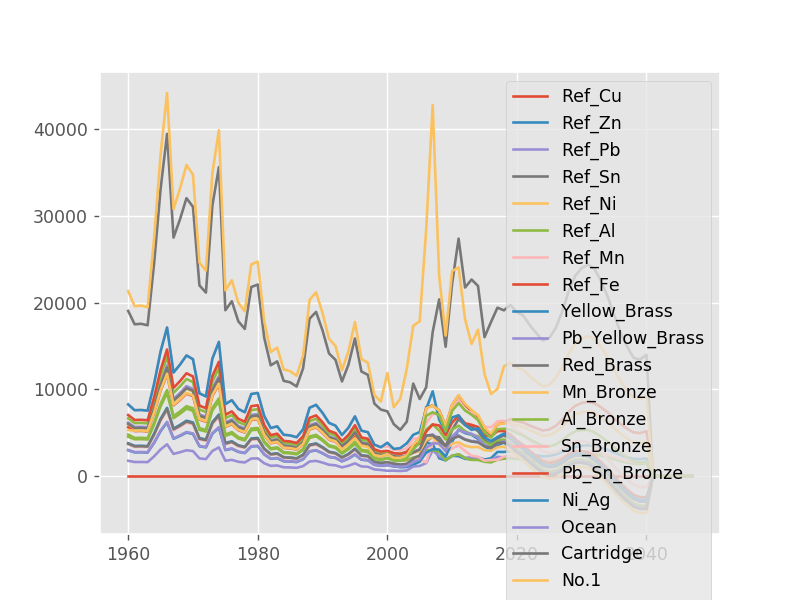

In [18]:
# scrap_supply
%matplotlib notebook
raw_price.plot()

<IPython.core.display.Javascript object>


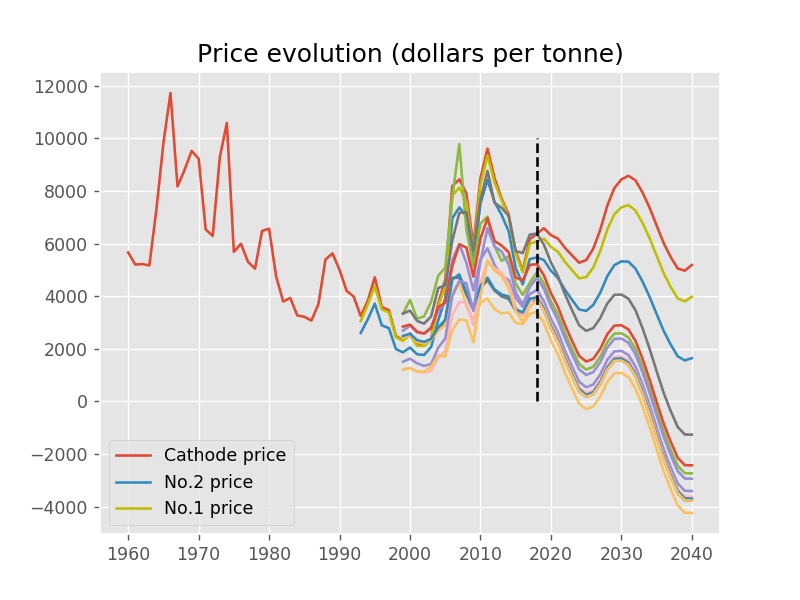

In [19]:
%matplotlib notebook
plt.style.use('ggplot')
plt.plot(cathode_price_series, label='Cathode price')
plt.plot(cathode_price_series-sp2_series, label='No.2 price')
plt.plot(cathode_price_series-sp1_series, label='No.1 price', color='y')
plt.plot(spa_series.apply(lambda x: cathode_price_series-x))
plt.plot([pd.datetime(2018,1,1), pd.datetime(2018,1,1)], [0, 10000], 'k--')

plt.legend()
plt.title('Price evolution (dollars per tonne)')
plt.show()


<IPython.core.display.Javascript object>


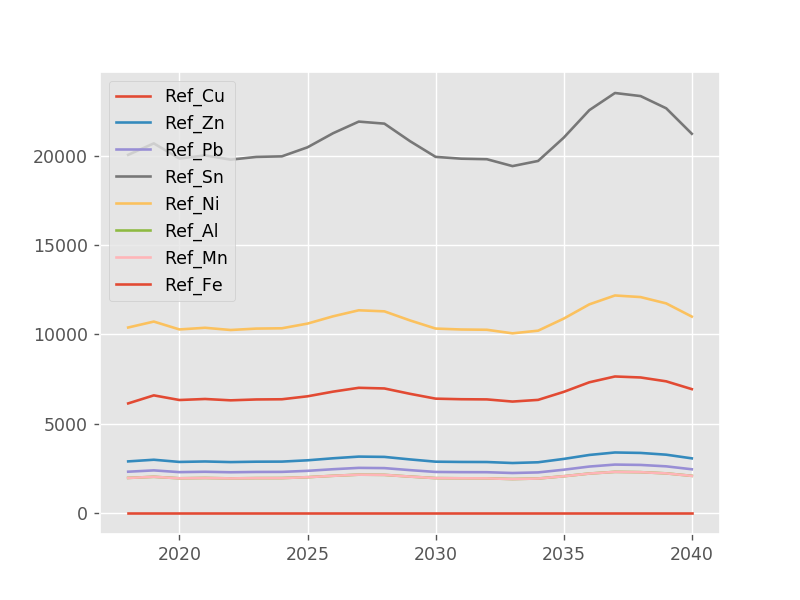

In [28]:
new = raw_price.copy()
for year_i in np.arange(2018,2041):
    t=pd.datetime(year_i, 1, 1)
    t_1 = pd.datetime(year_i-1, 1, 1)
    new.loc[year_i,ref_metals] = new.loc[year_i-1,ref_metals].apply(lambda x: x + (cathode_price_series[t] - cathode_price_series[t_1]) * x / cathode_price_series[t])
    
%matplotlib notebook
new.loc[2018:2040,'Ref_Cu':'Ref_Fe'].plot()

<IPython.core.display.Javascript object>


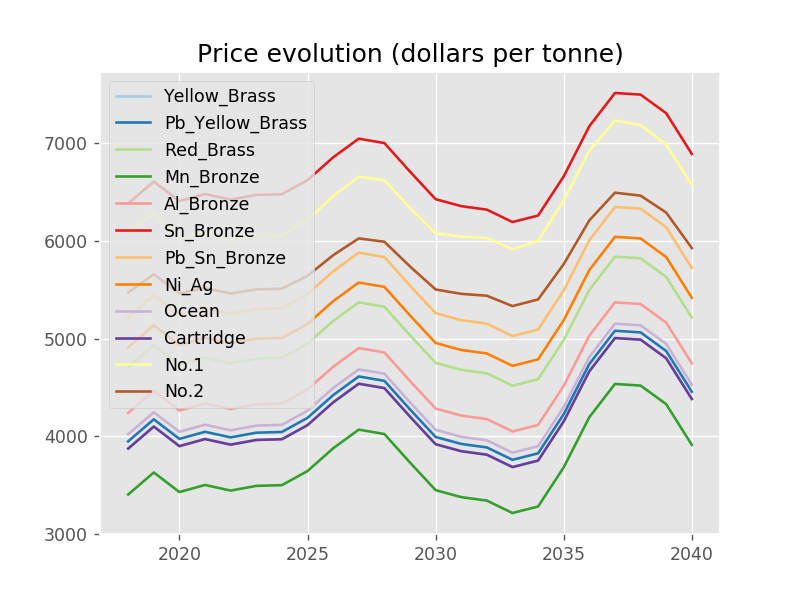

In [11]:
%matplotlib notebook
raw_price.loc[2018:2040,'Yellow_Brass':].plot(colormap='Paired')
plt.legend()
plt.title('Price evolution (dollars per tonne)')
plt.show()

<IPython.core.display.Javascript object>


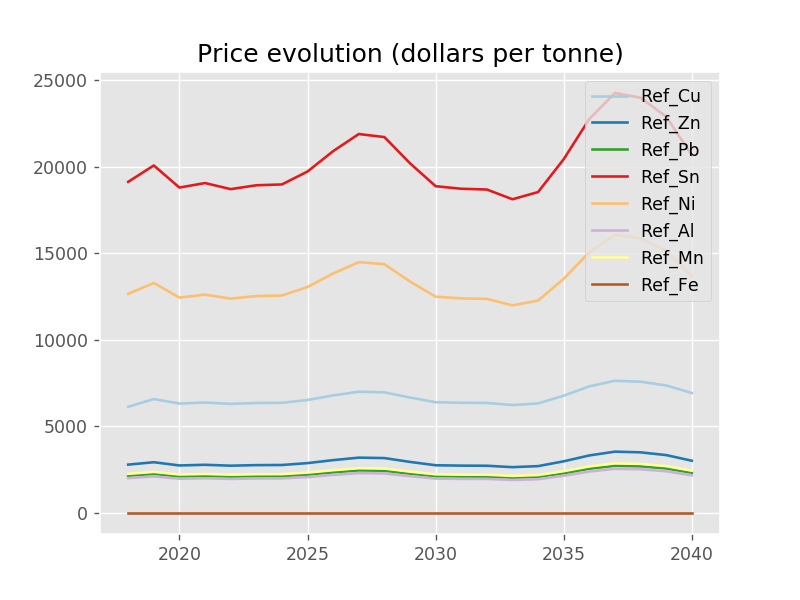

In [12]:
%matplotlib notebook
raw_price.loc[2018:2040,'Ref_Cu':'Ref_Fe'].plot(colormap='Paired')
plt.legend()
plt.title('Price evolution (dollars per tonne)')
plt.show()

In [15]:
# No.2 spread and cathode price correlation
print(sp2_series.diff().loc[:'20180101'].corr(cathode_price_series.diff().loc[:'20180101']))
print(sp2_series.diff().loc['20190101':].corr(cathode_price_series.diff().loc['20190101':]))

0.8490678763866732
0.96254319188395


<IPython.core.display.Javascript object>


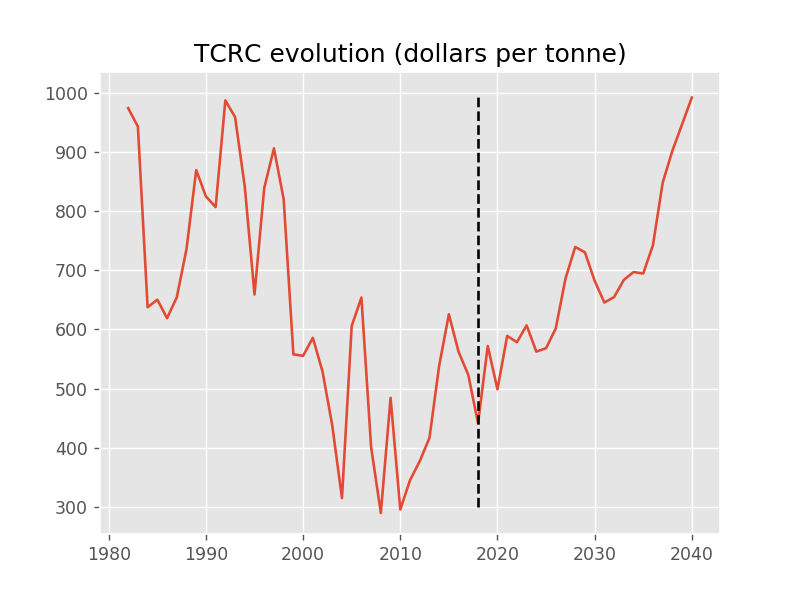

In [27]:
%matplotlib notebook
plt.style.use('ggplot')
plt.plot(tcrc_series)
plt.plot([pd.datetime(2018,1,1), pd.datetime(2018,1,1)], [300, 1000], 'k--')
plt.title('TCRC evolution (dollars per tonne)')
plt.show()


## Supply and demand evolution

<IPython.core.display.Javascript object>


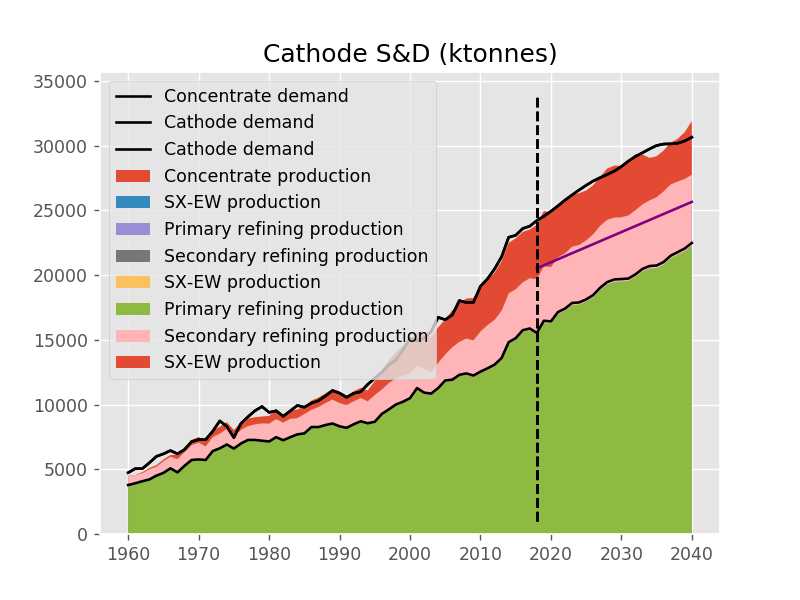

In [13]:
%matplotlib notebook
plt.style.use('ggplot')
plt.stackplot(mining_prod_df_all.loc['19600101':, :].index, mining_prod_df_all.loc['19600101':, :].transpose(), 
              labels=mining_prod_df_all.columns)
plt.plot(conc_demand_all, 'k', label='Concentrate demand')
plt.plot([pd.datetime(2018,1,1), pd.datetime(2040,1,1)], [20531, 25662], 'purple')

plt.plot([pd.datetime(2018,1,1), pd.datetime(2018,1,1)], [1000, 29000], 'k--')
plt.legend(loc=2)
plt.title('Mining S&D (ktonnes)')
plt.show()

<IPython.core.display.Javascript object>


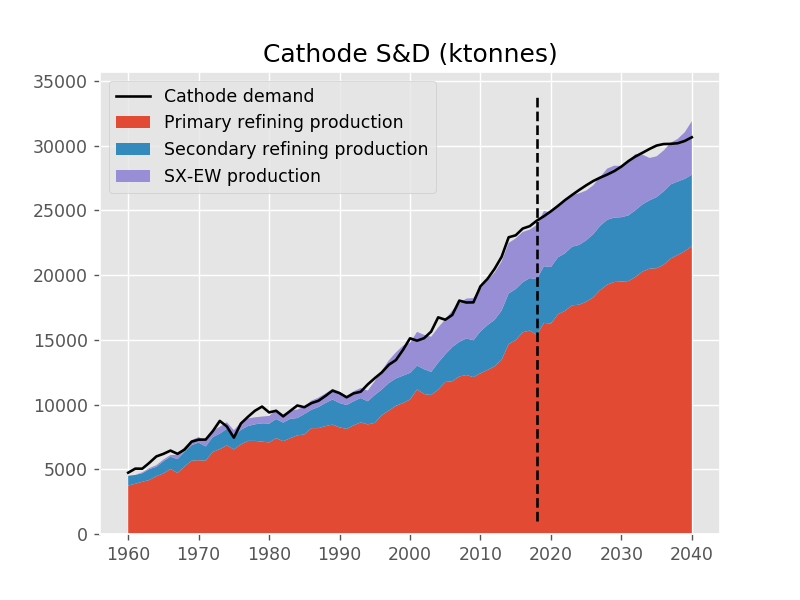

In [16]:
%matplotlib notebook
plt.stackplot(ref_prod_df_all.index, ref_prod_df_all.transpose(), 
              labels=ref_prod_df_all.columns)
plt.plot(ref_demand_all, 'k', label='Cathode demand')

plt.plot([pd.datetime(2018,1,1), pd.datetime(2018,1,1)], [1000, 34000], 'k--')
plt.legend(loc=2)
plt.title('Cathode S&D (ktonnes)')
plt.show()

In [70]:
# no1_frac = all_scrap_available.loc[2019,'No.1'] / all_scrap_available.loc[2019,'No.1':'No.2'].sum()
# unal =  all_scrap_available.loc[:2018,'No.2']*(10/9)
# all_scrap_available.loc[:2018,'No.1'] = unal*no1_frac
# all_scrap_available.loc[:2018,'No.2'] = unal*(1-no1_frac)
all_avail = all_scrap_available.copy()
all_avail.drop('No.1',axis=1,inplace=True)
all_avail.rename(columns = {'No.2':'Unalloyed'}, inplace = True)
all_avail.loc[:,'Unalloyed'] = all_scrap_available.loc[:,'No.1':'No.2'].sum(axis=1)

<IPython.core.display.Javascript object>


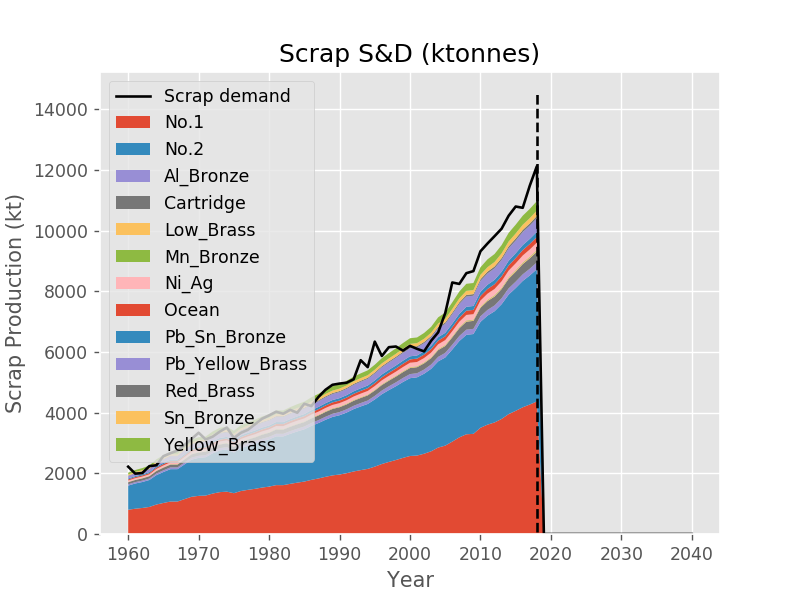

In [26]:
%matplotlib notebook
plt.stackplot(all_scrap_available.loc[1960:,:].index, all_scrap_available.loc[1960:,:].transpose(), 
              labels=all_scrap_available.loc[:,:].columns)
plt.plot(total_scrap_demand_all_life.loc[1960:,:].index, total_scrap_demand_all_life.loc[1960:,:].sum(axis=1), 'k', label='Scrap demand')

plt.plot([2018, 2018], [50, 14500], 'k--')
plt.legend(loc=2)
plt.title('Scrap S&D (ktonnes)')
plt.xlabel('Year')
plt.ylabel('Scrap Production (kt)')
plt.show()

<IPython.core.display.Javascript object>


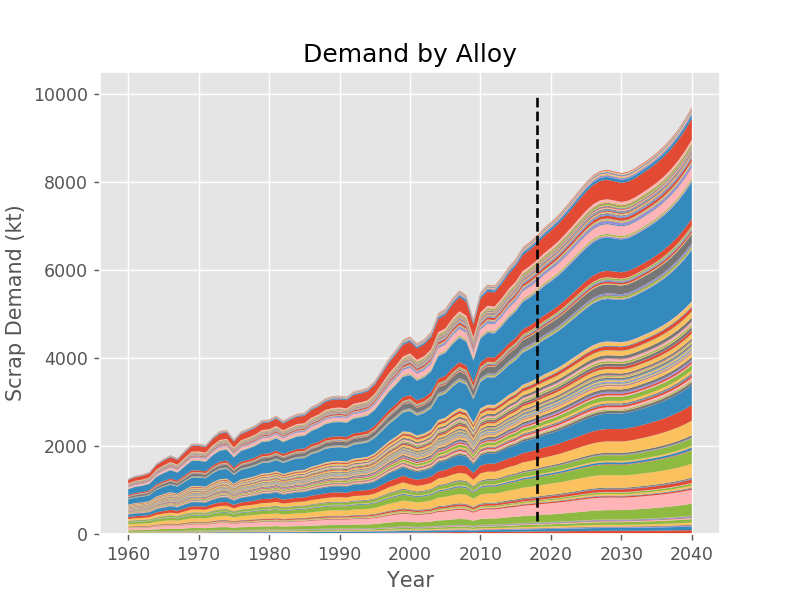

In [71]:
# this doesn't account for the unalloyed copper portion - this is only alloys
%matplotlib notebook
plt.stackplot(demand_by_alloy.loc[1960:].index, demand_by_alloy.loc[1960:].transpose(), labels = demand_by_alloy.columns)
plt.plot([2018, 2018], [300, 10000], 'k--')
plt.title('Demand by Alloy (ktonnes)')
plt.xlabel('Year')
plt.ylabel('Scrap Demand (kt)')
plt.show()

In [29]:
all_scrap_available

,No.1,No.2,Al_Bronze,Cartridge,Low_Brass,Mn_Bronze,Ni_Ag,Ocean,Pb_Sn_Bronze,Pb_Yellow_Brass,Red_Brass,Sn_Bronze,Yellow_Brass
1912,19.696758,177.270824,5.666829,9.501142,0.913241,0.464444,6.399659,4.341236,4.255321,10.678895,1.936488,4.663887,8.437639
1913,20.160211,181.441902,5.800166,9.724698,0.934729,0.475372,6.550239,4.443382,4.355446,10.930163,1.982053,4.773625,8.636172
1914,20.624491,185.620423,5.933681,9.949361,0.956295,0.486322,6.701207,4.545661,4.455575,11.181548,2.027819,4.883751,8.834798
1915,21.173637,190.562731,6.085367,10.286975,0.985843,0.499509,6.891862,4.661563,4.556140,11.445360,2.094159,5.033452,9.043114
1916,22.071479,198.643311,6.311162,11.068885,1.047039,0.521738,7.241542,4.834915,4.660774,11.774252,2.241607,5.339990,9.292543
1917,23.104342,207.939082,6.563781,11.896028,1.113238,0.546565,7.628338,5.040061,4.783597,12.218874,2.398633,5.670763,9.571631
1918,24.365967,219.293702,6.866816,12.737597,1.184757,0.575448,8.070565,5.303421,4.952753,12.902512,2.561618,6.026110,9.927455
1919,26.113746,235.023717,7.283239,13.905531,1.284481,0.615009,8.687588,5.665619,5.184387,13.867764,2.788241,6.518793,10.422932
1920,28.298962,254.690660,7.802639,15.419336,1.412160,0.664395,9.467626,6.106876,5.466474,15.009932,3.080878,7.148928,11.043329
1921,30.731863,276.586769,8.376900,17.123145,1.554337,0.719176,10.328404,6.586602,5.774242,16.200204,3.409108,7.852667,11.725234


<IPython.core.display.Javascript object>


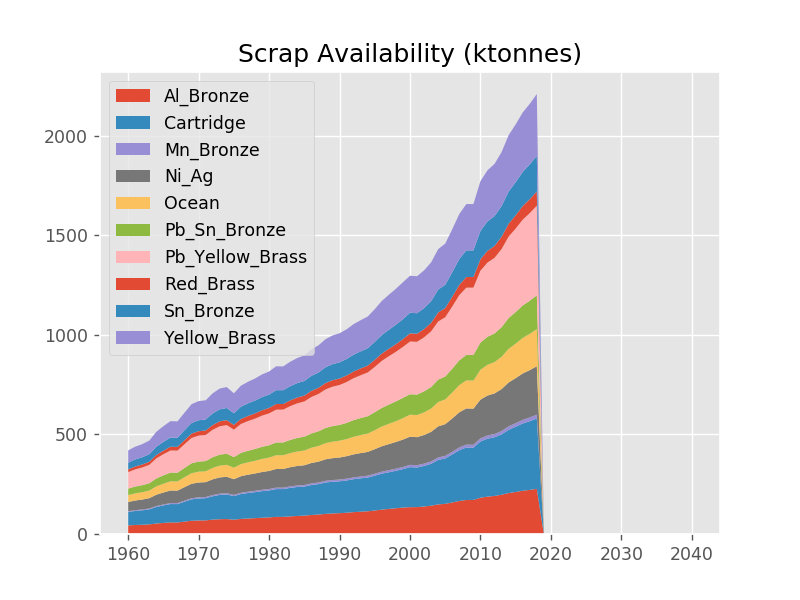

In [10]:
%matplotlib notebook
if 'Low_Brass' in all_scrap_available.columns:
    all_scrap_available.drop('Low_Brass', axis=1, inplace = True)
plt.stackplot(all_scrap_available.loc[1960:,:].index, all_scrap_available.loc[1960:,'Al_Bronze':].transpose(), labels=all_scrap_available.loc[:,'Al_Bronze':].columns)
# plt.plot(total_scrap_demand_all_life.loc[1960:,:].index, total_scrap_demand_all_life.loc[1960:,:].sum(axis=1), color = 'k', label='Scrap demand')
# plt.plot([2018, 2018], [1000, 15000], 'k--')
plt.legend(loc=2)
plt.title('Scrap Availability (ktonnes)')
plt.show()

## Ore grade evolution

In [25]:
def average_og_calculator(mine_life_panel_data):
    og_estimate=mine_life_panel_data.loc[:, idx[:, 'Ore treated (kt)']]\
    .mul(mine_life_panel_data.loc[:, idx[:, 'Head grade (%)']].values).div(1e2).sum(axis=1)\
    .div(mine_life_panel_data.loc[:, idx[:, 'Ore treated (kt)']].sum(axis=1)).mul(1e2)
    
    return og_estimate

In [26]:
og_history=pd.read_excel('Data/primary supply/Ore grade history.xls', sheet_name='Sheet1', index_col=0)
og_history_series=pd.Series(og_history.loc[:, 0].values, index=pd.date_range('19910101', '20180101', freq='AS'))

mine_life_stats_panel_all=pd.concat([mine_life_stats_panel_operating, mine_life_stats_panel_new], axis=1)

In [27]:
og_future=average_og_calculator(mine_life_stats_panel_all)
og_future.loc['20180101']=og_history_series.loc['20180101']

<IPython.core.display.Javascript object>


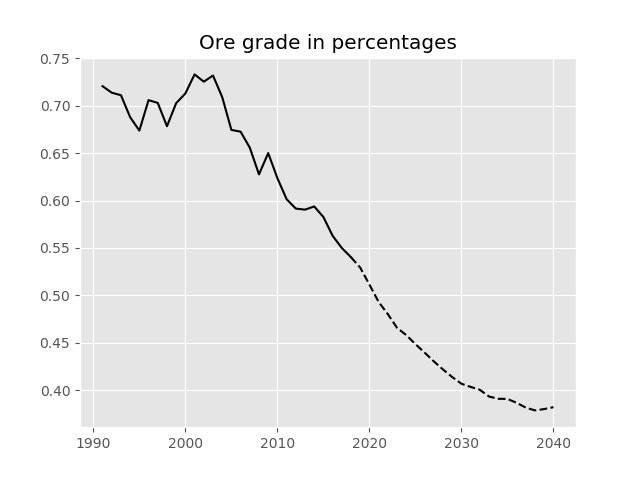

In [28]:
%matplotlib notebook
plt.plot(og_history_series, 'k', label='Historical ore grade')
plt.plot(og_future, 'k--', label='Future ore grade')

#plt.plot([pd.datetime(2018,1,1), pd.datetime(2018,1,1)], [0.4, 0.7], 'k--')
plt.title('Ore grade in percentages')
#plt.legend()
plt.show()

In [14]:
scrap_demand.sum(axis=1)

1950-01-01      756.136390
1951-01-01      789.993244
1952-01-01      801.278861
1953-01-01      762.907761
1954-01-01      799.021738
1955-01-01      981.848746
1956-01-01      950.249016
1957-01-01      929.934904
1958-01-01      934.449151
1959-01-01     1060.848070
1960-01-01     2021.640131
1961-01-01     2008.052818
1962-01-01     2018.966487
1963-01-01     2250.523860
1964-01-01     2346.717142
1965-01-01     2666.556720
1966-01-01     2750.351248
1967-01-01     2803.087736
1968-01-01     3029.540228
1969-01-01     3264.691716
1970-01-01     3426.018532
1971-01-01     3142.960190
1972-01-01     3366.378752
1973-01-01     3554.163142
1974-01-01     3661.596270
1975-01-01     3170.299950
1976-01-01     3467.493281
1977-01-01     3550.334600
1978-01-01     3764.158214
1979-01-01     4016.183613
                  ...     
2011-01-01     9165.029880
2012-01-01     9273.334435
2013-01-01     9678.079481
2014-01-01    10025.049229
2015-01-01    10237.134125
2016-01-01    10420.830965
2

In [29]:
og_future

2018-01-01    0.540173
2019-01-01    0.529229
2020-01-01    0.511303
2021-01-01    0.492989
2022-01-01    0.480173
2023-01-01    0.465682
2024-01-01    0.458036
2025-01-01    0.448443
2026-01-01    0.439494
2027-01-01    0.430258
2028-01-01    0.421672
2029-01-01    0.413704
2030-01-01    0.406653
2031-01-01    0.403313
2032-01-01    0.400255
2033-01-01    0.393154
2034-01-01    0.390808
2035-01-01    0.390588
2036-01-01    0.386520
2037-01-01    0.381418
2038-01-01    0.378526
2039-01-01    0.379952
2040-01-01    0.381938
Freq: AS-JAN, dtype: float64

''

## Availability Evolution

<IPython.core.display.Javascript object>


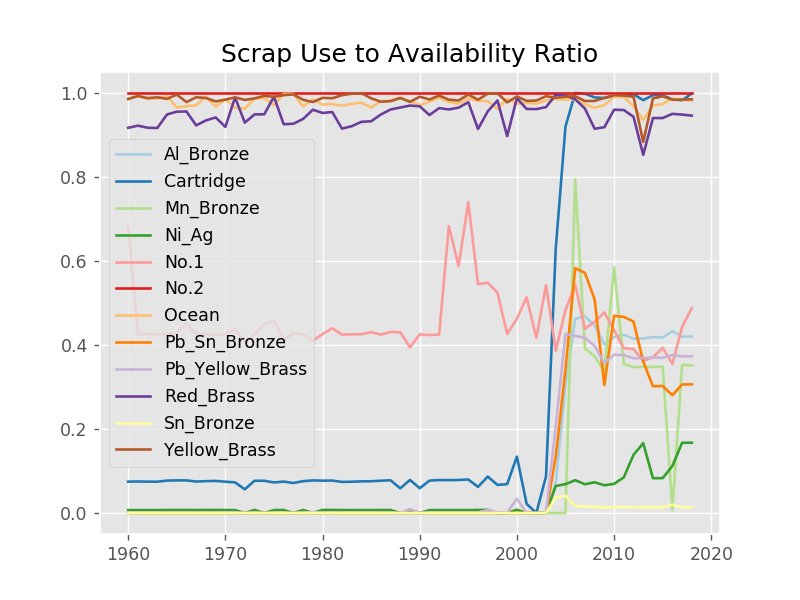

In [35]:
# scrap_use_avail_ratio.loc[2018,'No.2'] = 1
%matplotlib notebook
# cmap = plt.cm.jet#seismic#PuOr#magma#nipy_spectral
# colors = cmap(np.linspace(0., 1., len(scrap_use_avail_ratio.loc[2018,:])))
scrap_use_avail_ratio.loc[:].plot(colormap = 'Paired')

plt.title('Scrap Use to Availability Ratio')
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


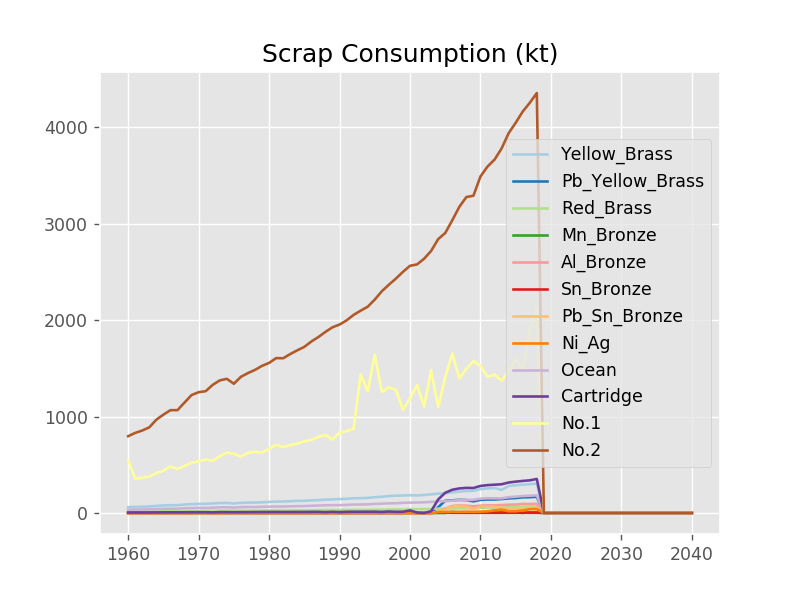

In [12]:
%matplotlib notebook
direct_melt_demand.loc[:,'Yellow_Brass':'No.2'].plot(colormap = 'Paired')
# plt.plot(total_scrap_demand_all_life.loc[2019:,'Refined scrap'], label='No.2', color='k')
plt.title('Scrap Consumption (kt)')
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


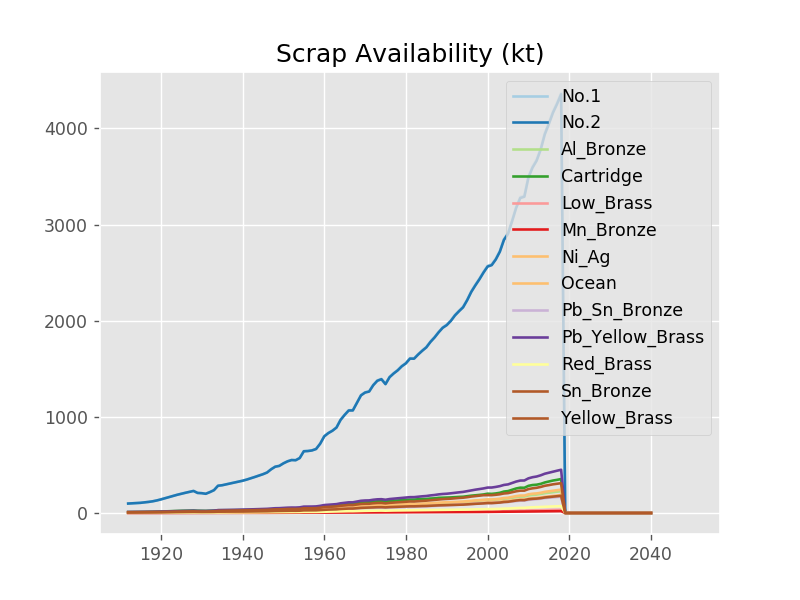

In [36]:
%matplotlib notebook
plt.style.use('ggplot')
all_scrap_available.loc[:,:].plot(colormap = 'Paired')
plt.plot(2050,0)
plt.title('Scrap Availability (kt)')
plt.legend(loc='upper right')
plt.show()

<IPython.core.display.Javascript object>


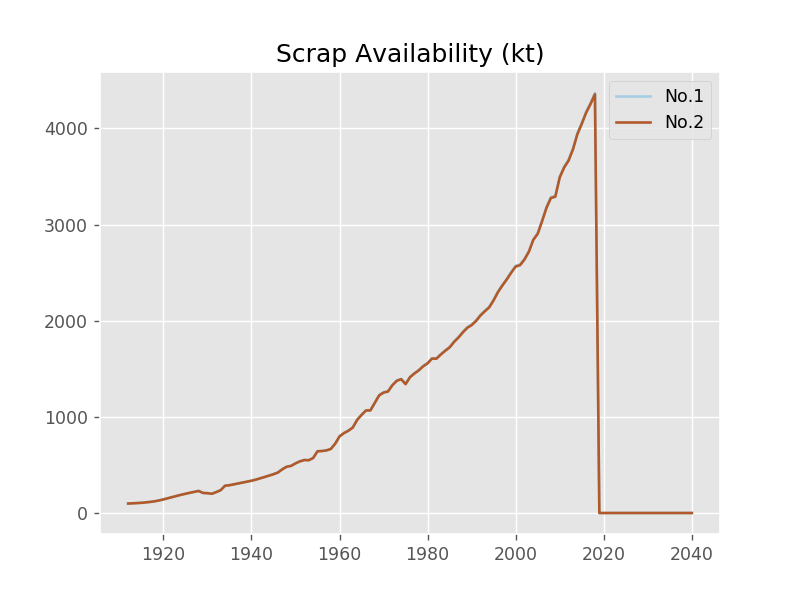

In [39]:
%matplotlib notebook
all_scrap_available.loc[:,['No.1','No.2']].plot(colormap = 'Paired')

plt.title('Scrap Availability (kt)')
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


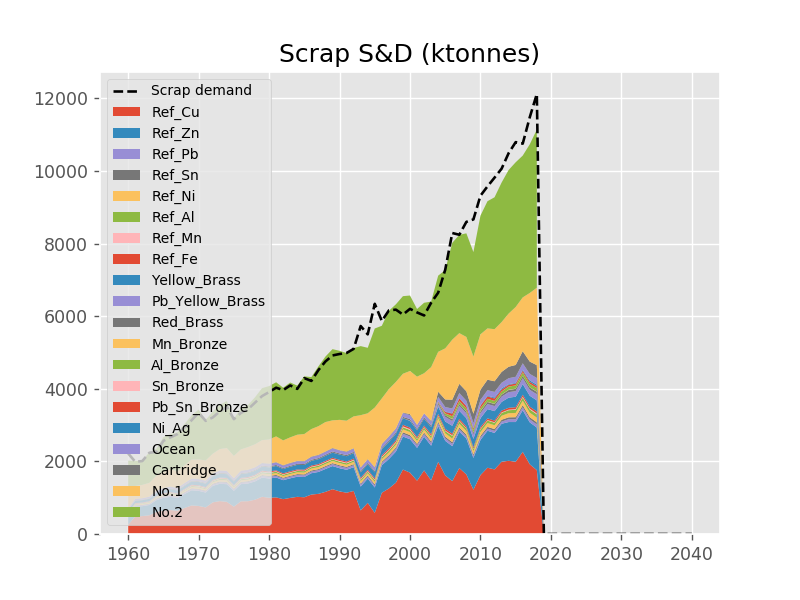

In [41]:
# direct_melt_demand.loc[:,'No.2'] = total_scrap_demand_all_life.loc[1960:, 'Refined scrap']
%matplotlib notebook
plt.stackplot(direct_melt_demand.loc[1960:,:].index, direct_melt_demand.loc[1960:,:].transpose(), 
              labels=direct_melt_demand.columns)
plt.plot(total_scrap_demand_all_life.loc[1960:,:].index, total_scrap_demand_all_life.loc[1960:,:].sum(axis=1), 'k--', label='Scrap demand')

# plt.plot([2018, 2018], [1000, 15000], 'k--')
plt.legend(loc=2, prop={'size': 8})
plt.title('Scrap S&D (ktonnes)')
plt.show()

<IPython.core.display.Javascript object>


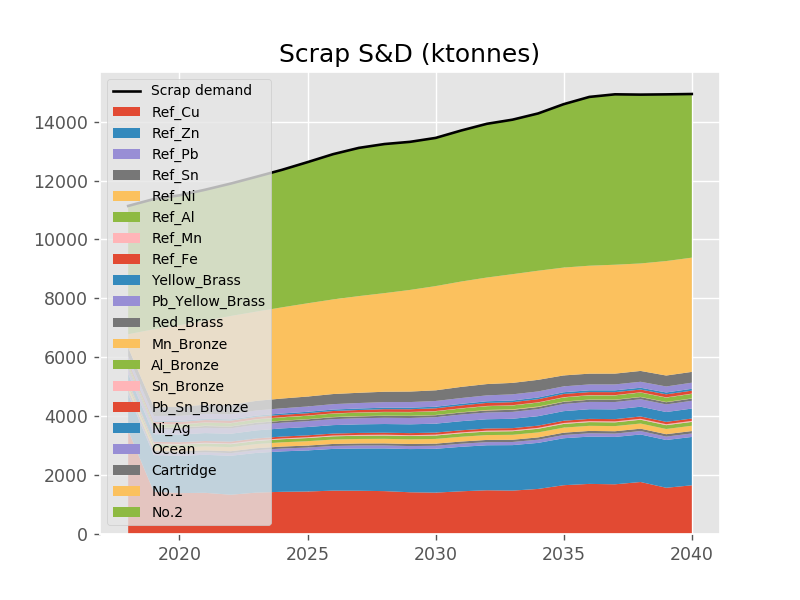

In [36]:
direct_melt_demand.loc[:,'No.2'] = total_scrap_demand_all_life.loc[2018:, 'Refined scrap']
%matplotlib notebook
plt.stackplot(direct_melt_demand.loc[2018:,:].index, direct_melt_demand.loc[2018:,:].transpose(), 
              labels=direct_melt_demand.columns)
plt.plot(total_scrap_demand_all_life.loc[2018:,:].index, total_scrap_demand_all_life.loc[2018:,:].sum(axis=1), 'k', label='Scrap demand')

# plt.plot([2018, 2018], [1000, 15000], 'k--')
plt.legend(loc=2, prop={'size': 8})
plt.title('Scrap S&D (ktonnes)')
plt.show()

<IPython.core.display.Javascript object>


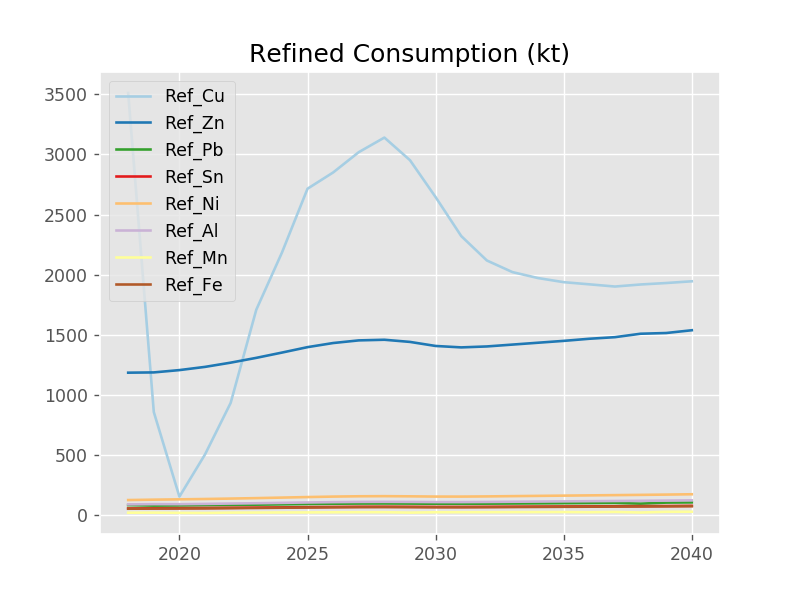

In [34]:
%matplotlib notebook
direct_melt_demand.loc[:,:'Ref_Fe'].plot(colormap = 'Paired')

plt.title('Refined Consumption (kt)')
plt.legend(loc='upper left')
plt.show()

# Scenario Analysis

In [9]:
sd_baseline_max10=pd.read_excel('Data/scenario results/simulated supply and demand baseline max10.xls', sheet_name='Sheet1', index_col=0)
scrap_supply_baseline_max10=sd_baseline_max10.loc['19600101':, 'Scrap production']
mining_supply_baseline_max10=sd_baseline_max10.loc['19600101':, ['Concentrate production', 'SX-EW production']].sum(axis=1)

FileNotFoundError: [Errno 2] No such file or directory: 'Data/scenario results/simulated supply and demand baseline max10.xls'

In [ ]:
sd_sc22=pd.read_excel('Data/scenario results/simulated supply and demand sc22.xls', sheet_name='Sheet1', index_col=0)
scrap_supply_sc22=sd_sc22.loc['19600101':, 'Scrap production']
mining_supply_sc22=sd_sc22.loc['19600101':, ['Concentrate production', 'SX-EW production']].sum(axis=1)

shock_sc22_perm=scrap_supply_sc22-scrap_supply_baseline_max10
mining_response_sc22=mining_supply_sc22-mining_supply_baseline_max10
displacement_sc22=mining_response_sc22.cumsum().div(shock_sc22_perm.cumsum()).mul(-1)

In [ ]:
%matplotlib notebook
plt.plot(scrap_supply_baseline_max10, label='Scrap supply baseline')
plt.plot(scrap_supply_sc24, label='Scrap supply scenario 24')

plt.plot([pd.datetime(2018,1,1), pd.datetime(2018,1,1)], [500, 15500], 'k--')
plt.title('Scrap Supply (ktonnes)')
plt.legend()
plt.show()

In [ ]:
%matplotlib notebook
plt.plot(mining_supply_baseline_max10, label='Mining supply baseline')
plt.plot(mining_supply_sc24, label='Mining supply scenario 24')

plt.plot([pd.datetime(2018,1,1), pd.datetime(2018,1,1)], [1000, 29000], 'k--')
plt.title('Mining Supply (ktonnes)')
plt.legend()
plt.show()

In [ ]:
%matplotlib notebook
plt.plot(displacement_sc24.loc['20190101':])
plt.plot([pd.datetime(2018,1,1), pd.datetime(2040,1,1)], [0, 0], 'k--')

plt.title('Sorting efficiency rise 5% at 2019')
plt.show()